In [ ]:
!python -m spacy download en
!python -m spacy download en_core_web_md

2023-06-11 14:28:02.067848: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-11 14:28:03.641714: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 85.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
2023-06-11 14:28:23.236139: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in perfo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import string # special operations on strings
import spacy # language models
import re
from wordcloud import WordCloud

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Resumes.csv to Resumes.csv


In [3]:
import pandas as pd
import numpy as np
Resumes=pd.read_csv('Resumes.csv')
Resumes

Resume         Category
0   Name: Ravali P ,                              ...  React Developer
1     ,SUSOVAN  BAG   ,Seeking  a  challenging  po...  React Developer
2   Kanumuru Deepak Reddy,CAREER OBJECTIVE:,To sec...  React Developer
3   HARIPRIYA BATTINA ,Experience as UI Developer ...  React Developer
4   KAMALAKAR REDDY. A ,Linked In: https://www.lin...  React Developer
..                                                ...              ...
74  \tWorkday Integration Consultant,Name         ...          Workday
75  Seeking suitable positions in Workday HCM  as ...          Workday
76  WORKDAY | HCM | FCM,Name \t\t: Kumar S.S,Role ...          Workday
77  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...          Workday
78                                                ...          Workday

[79 rows x 2 columns]

In [4]:
Resumes.shape

(79, 2)

In [5]:
Resumes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resume    79 non-null     object
 1   Category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [6]:
Resumes.isna().sum()

Resume      0
Category    0
dtype: int64

*  There is no null values in the dataset.

In [7]:
Resumes.duplicated().value_counts()

False    77
True      2
dtype: int64

In [8]:
Resumes[Resumes.duplicated()]

Resume         Category
12  Ui-Developer/ React JS Developer ,NAME: KRISHN...  React Developer
18  MAREEDU LOKESH BABU,PROFESSIONAL OVERVIEW,   A...  React Developer

In [9]:
#removing duplicate records
Resumes=Resumes.drop_duplicates().reset_index()
Resumes=Resumes.drop('index',axis=1)
Resumes

Resume         Category
0   Name: Ravali P ,                              ...  React Developer
1     ,SUSOVAN  BAG   ,Seeking  a  challenging  po...  React Developer
2   Kanumuru Deepak Reddy,CAREER OBJECTIVE:,To sec...  React Developer
3   HARIPRIYA BATTINA ,Experience as UI Developer ...  React Developer
4   KAMALAKAR REDDY. A ,Linked In: https://www.lin...  React Developer
..                                                ...              ...
72  \tWorkday Integration Consultant,Name         ...          Workday
73  Seeking suitable positions in Workday HCM  as ...          Workday
74  WORKDAY | HCM | FCM,Name \t\t: Kumar S.S,Role ...          Workday
75  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...          Workday
76                                                ...          Workday

[77 rows x 2 columns]

In [10]:
Resumes['Category'].value_counts()

React Developer    22
Workday            21
Peoplesoft         20
SQL Developer      14
Name: Category, dtype: int64

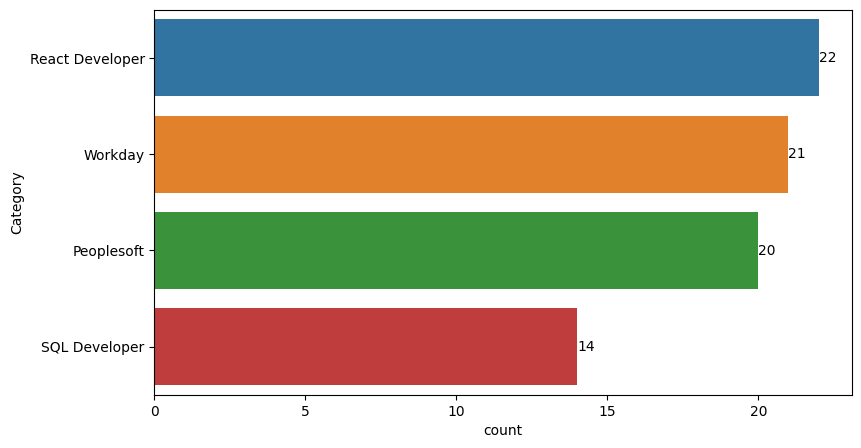

In [11]:
plt.figure(figsize=(9,5))

ax =sns.countplot(data=Resumes, y='Category', order=Resumes['Category'].value_counts(ascending=False).index)
for label in ax.containers:
    ax.bar_label(label)

## JOb description

In [12]:
import pandas as pd

# Dictionary
data = {
    'JOb': ['React Developer', 'Peoplesoft', 'SQL Developer', 'Workday'],
    'Description': ["""Title: React Developer
We are seeking a talented React developer to join our dynamic team. As a React developer, you will be responsible for designing and implementing user interfaces for web applications using React.js. You should have a strong understanding of JavaScript, HTML, and CSS, as well as experience with modern front-end development tools and libraries.

Responsibilities:

Develop user-facing features using React.js
Collaborate with cross-functional teams to define, design, and ship new features
Optimize web applications for maximum performance and scalability
Write clean, maintainable code and perform thorough code reviews
Ensure the technical feasibility of UI/UX designs
Stay up-to-date with the latest industry trends and technologies
Requirements:

Solid experience in front-end web development, with a focus on React.js
Proficient understanding of web markup, including HTML5 and CSS3
Strong understanding of JavaScript and its core principles
Familiarity with server-side CSS pre-processing platforms (e.g., Sass)
Experience with version control systems, such as Git
Knowledge of modern front-end build pipelines and tools
Understanding of responsive design and mobile-first development
Excellent problem-solving and analytical skills
Strong communication and teamwork abilities
If you are passionate about creating exceptional user experiences and have a solid background in React development, we would love to hear from you. Join our team and contribute to the success of our cutting-edge web applications."""

, """Title: PeopleSoft Developer

Job Description:

We are seeking an experienced PeopleSoft Developer to join our team. In this role, you will be responsible for designing, developing, and maintaining PeopleSoft applications and systems. You will collaborate with cross-functional teams to gather requirements, analyze business processes, and implement solutions that meet our organization's needs.

Responsibilities:

Develop and customize PeopleSoft applications based on business requirements and specifications.
Design, code, test, debug, and document PeopleSoft programs and system modifications.
Collaborate with functional analysts and end-users to gather requirements and provide technical expertise and guidance.
Participate in the full software development life cycle, including analysis, design, development, testing, deployment, and maintenance.
Conduct unit testing and system integration testing to ensure the quality and performance of developed solutions.
Troubleshoot and resolve application and system issues, providing timely support to end-users.
Create and maintain technical documentation, including program specifications, user manuals, and system documentation.
Stay up-to-date with the latest PeopleSoft technologies, tools, and best practices.
Provide technical guidance and mentoring to junior developers when needed.
Qualifications:

Bachelor's degree in Computer Science, Information Systems, or a related field.
Proven experience as a PeopleSoft Developer, working with PeopleTools, PeopleCode, Application Engine, Component Interface, and other PeopleSoft development tools.
Strong understanding of PeopleSoft architecture and data structures.
Proficient in SQL and PL/SQL.
Experience with PeopleSoft Financials, HRMS, or Campus Solutions modules is highly desirable.
Familiarity with PeopleSoft Fluid User Interface and PeopleSoft Security Administration is a plus.
Ability to analyze complex business requirements and translate them into technical solutions.
Excellent problem-solving and debugging skills.
Strong communication and interpersonal skills.
Ability to work independently as well as collaboratively in a team environment.
If you're interested in this PeopleSoft Developer position and meet the qualifications outlined above, please submit your resume and a cover letter detailing your relevant experience and achievements.

""", """Title: SQL Developer
We are seeking an experienced SQL developer to join our team. As an SQL developer, you will be responsible for designing, developing, and maintaining our company's database systems. You will collaborate with cross-functional teams to gather requirements, create efficient database structures, and optimize SQL queries for performance.

Responsibilities:

Designing and implementing database structures, tables, and relationships.
Writing efficient SQL queries for data retrieval, manipulation, and reporting.
Collaborating with software developers to integrate databases with applications.
Troubleshooting and resolving database issues and performance bottlenecks.
Performing database maintenance tasks such as backups, restores, and index rebuilds.
Ensuring data integrity and security by implementing proper access controls and data encryption.
Monitoring database performance and optimizing query execution time.
Creating and maintaining database documentation, including data models and schemas.
Requirements:

Proven work experience as an SQL developer or in a similar role.
In-depth knowledge of SQL and relational database management systems (RDBMS).
Proficiency in writing complex SQL queries, stored procedures, and functions.
Experience with database design and data modeling.
Familiarity with performance tuning and query optimization techniques.
Strong problem-solving and analytical skills.
Excellent communication and teamwork abilities.
Attention to detail and ability to work in a fast-paced environment.
Relevant certifications in database administration or SQL development are a plus.
If you are a dedicated SQL developer with a passion for data and want to contribute to our company's success, we would love to hear from you. Join our team and be part of building robust and scalable database solutions.""",
                    """Title: Workday Consultant

Job Description:
We are seeking a highly skilled and experienced Workday Consultant to join our team. As a Workday Consultant, you will be responsible for providing expert guidance and support in the implementation, configuration, and maintenance of Workday software for our clients.

Responsibilities:

Collaborate with clients to gather requirements and design solutions using the Workday platform.
Configure and customize Workday modules based on client needs, including Core HCM, Compensation, Benefits, Absence, Time Tracking, and Talent Management.
Conduct system testing, including creating and executing test scripts, to ensure the accuracy and functionality of Workday configurations.
Assist in data migration and integration efforts, including defining data requirements, performing data mapping, and validating data accuracy.
Provide end-user training and support during the implementation and post-implementation phases.
Troubleshoot and resolve issues related to Workday functionality and configuration.
Stay updated with the latest Workday features and enhancements and assess their potential impact on clients.
Collaborate with cross-functional teams, including HR, IT, and finance, to ensure successful Workday implementation and integration.
Requirements:

Bachelor's degree in Information Technology, Computer Science, or a related field.
Proven experience as a Workday Consultant or in a similar role, with hands-on experience in Workday implementation and configuration.
Strong knowledge of Workday modules, business processes, and best practices.
Proficiency in Workday configuration, including creating calculated fields, custom reports, and business processes.
Experience with Workday integrations, EIBs, and Web Services.
Understanding of HR, Payroll, and Finance processes.
Excellent problem-solving and analytical skills.
Strong communication and interpersonal skills, with the ability to effectively interact with clients and stakeholders.
Workday certification(s) is a plus.
Join our team and leverage your expertise in Workday to help organizations optimize their HR and finance processes. Apply now and be part of our dynamic and growing team!
"""]
}

# Create DataFrame
df = pd.DataFrame(data)


In [13]:
df

JOb                                        Description
0  React Developer  Title: React Developer\nWe are seeking a talen...
1       Peoplesoft  Title: PeopleSoft Developer\n\nJob Description...
2    SQL Developer  Title: SQL Developer\nWe are seeking an experi...
3          Workday  Title: Workday Consultant\n\nJob Description:\...

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub(r'\b\d+\b', '', text)  # remove independent numbers
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text) # remove punctuations
    text = re.sub(r'[^\x00-\x7f]', ' ', text) # remove extra whitespace
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back to a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [15]:
df['cleaned_jd'] = df['Description'].apply(lambda x: preprocess_text(x))
df

JOb                                        Description  \
0  React Developer  Title: React Developer\nWe are seeking a talen...   
1       Peoplesoft  Title: PeopleSoft Developer\n\nJob Description...   
2    SQL Developer  Title: SQL Developer\nWe are seeking an experi...   
3          Workday  Title: Workday Consultant\n\nJob Description:\...   

                                          cleaned_jd  
0  title react developer seeking talented react d...  
1  title peoplesoft developer job description see...  
2  title sql developer seeking experienced sql de...  
3  title workday consultant job description seeki...

## Resumes df eda

##Stopwords

In [16]:
#removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')
Resumes['#stopwords'] = Resumes['Resume'].apply(lambda x: len([x for x in x.split() if x in stop]))
Resumes.sample(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Resume         Category  \
2   Kanumuru Deepak Reddy,CAREER OBJECTIVE:,To sec...  React Developer   
25  Murali,Experience Summary ,I have 6 years of e...       Peoplesoft   
58  Hari Krishna M,Summary:,A result oriented prof...          Workday   
63  JYOTI VERMA\t\t\t\t\t,3 years of Experience in...          Workday   
17  MD KHIZARUDDIN RAUF , \t EXPERIENCE ,     ,⇨ C...  React Developer   

    #stopwords  
2          134  
25         111  
58         244  
63         110  
17          70

##Text Pre-Processing

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub(r'\b\d+\b', '', text)  # remove independent numbers
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text) # remove punctuations
    text = re.sub(r'[^\x00-\x7f]', ' ', text) # remove the non latin characters
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back to a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
Resumes['Resume_cln'] = Resumes['Resume'].apply(lambda x: preprocess_text(x))
Resumes.sample(5)

Resume         Category  \
14  Venkatalakshmi Pedireddy,Software Developer,Ex...  React Developer   
39  R Ahmed                                       ...       Peoplesoft   
12  CURRICULUM VITAE,I hereby declare that the abo...  React Developer   
65  Mooraboyina Guravaiah,Workday Integration Spec...          Workday   
28  PEOPLESOFT Administrator,SRINIVAS.K \t\t\t\t\t...       Peoplesoft   

    #stopwords                                         Resume_cln  
14          43  venkatalakshmi pedireddy software developer ex...  
39          75  r ahmed peoplesoft technical consultant profes...  
12           5  curriculum vitae hereby declare mentioned part...  
65         214  mooraboyina guravaiah workday integration spec...  
28         639  peoplesoft administrator srinivas k experience...

In [19]:
df.iloc[0,2]

'title react developer seeking talented react developer join dynamic team react developer responsible designing implementing user interface web application using react j strong understanding javascript html cs well experience modern front end development tool library responsibility develop user facing feature using react j collaborate cross functional team define design ship new feature optimize web application maximum performance scalability write clean maintainable code perform thorough code review ensure technical feasibility ui ux design stay date latest industry trend technology requirement solid experience front end web development focus react j proficient understanding web markup including html cs strong understanding javascript core principle familiarity server side cs pre processing platform e g sas experience version control system git knowledge modern front end build pipeline tool understanding responsive design mobile first development excellent problem solving analytical s

In [20]:
df['JOb'].unique()

array(['React Developer', 'Peoplesoft', 'SQL Developer', 'Workday'],
      dtype=object)

In [21]:
Resumes['Category'].unique()

array(['React Developer', 'Peoplesoft', 'SQL Developer', 'Workday'],
      dtype=object)

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

similarity_score=[]
val=[0,1,2,3]
roles=['React Developer', 'Peoplesoft', 'SQL Developer', 'Workday']
for i, role in zip(val, roles):
  # Load the resumes dataframe
  scoredf=pd.DataFrame(Resumes.loc[Resumes['Category'] == role,'Resume_cln'])  # Replace 'resumes.csv' with the path to your resumes dataframe
  # Extract the job description text
  job_desc = df['cleaned_jd'].values[i]
  # Create a TF-IDF vectorizer
  vectorizer = TfidfVectorizer()
  # Fit and transform the job description
  job_desc_vector = vectorizer.fit_transform([job_desc])
  # Iterate over each resume in the resumes dataframe
  for index, row in scoredf.iterrows():
    # Get the resume text
    resume_text = row['Resume_cln']

    # Transform the resume text
    resume_vector = vectorizer.transform([resume_text])

    # Calculate the cosine similarity between the resume and job description vectors
    similarity_score.append(cosine_similarity(resume_vector, job_desc_vector)[0][0])

# Print the resulting resumes dataframe with the similarity scores
Resumes['similarity_score']=similarity_score
Resumes.sample(5)

Resume         Category  \
19  Ranga Gaganam  , , ,Having 1+ years of success...  React Developer   
66  Name\t: Naresh Babu Cherukuri,Objective:,To ta...          Workday   
25  Murali,Experience Summary ,I have 6 years of e...       Peoplesoft   
3   HARIPRIYA BATTINA ,Experience as UI Developer ...  React Developer   
5   Naveen Sadhu,Title: software developer\t\t\t\t...  React Developer   

    #stopwords                                         Resume_cln  \
19          52  ranga gaganam year successful experience phase...   
66         213  name naresh babu cherukuri objective take resp...   
25         111  murali experience summary year experience work...   
3          106  haripriya battina experience ui developer reac...   
5           58  naveen sadhu title software developer location...   

    similarity_score  
19          0.719396  
66          0.570682  
25          0.479551  
3           0.513049  
5           0.491473

In [23]:
Resumes

Resume         Category  \
0   Name: Ravali P ,                              ...  React Developer   
1     ,SUSOVAN  BAG   ,Seeking  a  challenging  po...  React Developer   
2   Kanumuru Deepak Reddy,CAREER OBJECTIVE:,To sec...  React Developer   
3   HARIPRIYA BATTINA ,Experience as UI Developer ...  React Developer   
4   KAMALAKAR REDDY. A ,Linked In: https://www.lin...  React Developer   
..                                                ...              ...   
72  \tWorkday Integration Consultant,Name         ...          Workday   
73  Seeking suitable positions in Workday HCM  as ...          Workday   
74  WORKDAY | HCM | FCM,Name \t\t: Kumar S.S,Role ...          Workday   
75  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...          Workday   
76                                                ...          Workday   

    #stopwords                                         Resume_cln  \
0           58  name ravali p curriculum vitae specialization ...   
1           38  susovan bag seeking challenging position field...   
2          134  kanumuru deepak reddy career objective secure ...   
3          106  haripriya battina experience ui developer reac...   
4           48  kamalakar reddy linked professional summary ye...   
..         ...                                                ...   
72         197  workday integration consultant name sri krishn...   
73         191  seeking suitable position workday hcm techno f...   
74         228  workday hcm fcm name kumar role workday consul...   
75          80  venkateswarlu b workday consultant year experi...   
76         150  vinay kumar v workday functional consultant ex...   

    similarity_score  
0           0.102086  
1           0.328379  
2           0.680613  
3           0.513049  
4           0.633132  
..               ...  
72          0.643059  
73          0.669410  
74          0.661927  
75          0.734126  
76          0.640596  

[77 rows x 5 columns]

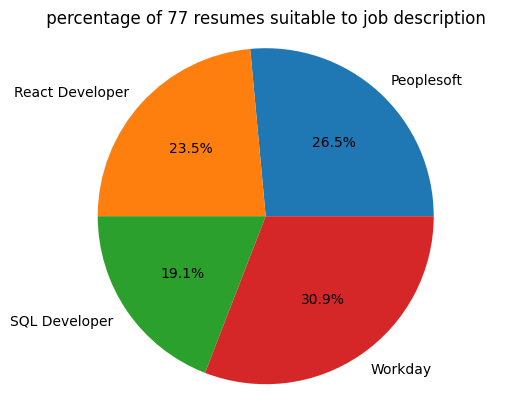

In [24]:
grouped_df = Resumes[Resumes['similarity_score'] > 0.49].groupby('Category')['similarity_score'].size()

# Create a pie chart
plt.pie(grouped_df, labels=grouped_df.index, autopct='%1.1f%%')
plt.title(' percentage of 77 resumes suitable to job description ')
plt.axis('equal')
plt.show()

In [25]:
# Set the categories and values
categories = Resumes['Category'].unique()

for i, category in enumerate(categories):
  values1=Resumes[Resumes['similarity_score'] > 0.49].groupby('Category')['similarity_score'].size()
  values1=pd.DataFrame(values1)

for i, category in enumerate(categories):
  values2 = Resumes[Resumes['similarity_score'] <= 0.49].groupby('Category')['similarity_score'].size()
  values2=pd.DataFrame(values2)

values1,values2

(                 similarity_score
 Category                         
 Peoplesoft                     18
 React Developer                16
 SQL Developer                  13
 Workday                        21,
                  similarity_score
 Category                         
 Peoplesoft                      2
 React Developer                 6
 SQL Developer                   1)

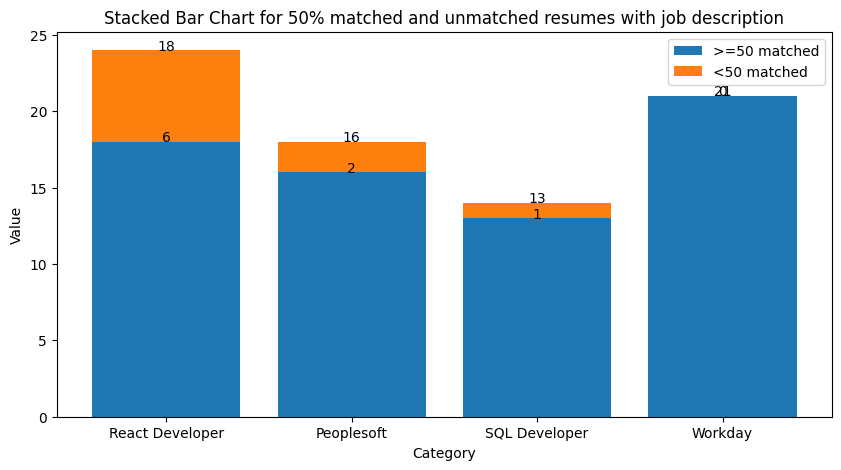

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample dataframe
data = {
    'Category': ['React Developer', 'Peoplesoft', 'SQL Developer', 'Workday'],
    'Value1': [18, 16, 13,21],
    'Value2': [6, 2, 1,0]
}
df = pd.DataFrame(data)

# Set the categories and values
categories = df['Category']
values1 = df['Value1']
values2 = df['Value2']

# Create a stacked bar chart
plt.figure(figsize=(10,5))
plt.bar(categories, values1, label='>=50 matched')
plt.bar(categories, values2, bottom=values1, label='<50 matched')

# Add values as text annotations on top of the bars
for i, category in enumerate(categories):
    plt.text(category, values1[i] + values2[i], str(values1[i]), ha='center')
    plt.text(category, values1[i], str(values2[i]), ha='center')

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Stacked Bar Chart for 50% matched and unmatched resumes with job description')

# Display the legend
plt.legend()

plt.show()


In [27]:
Resumes_cleaned=Resumes[['Resume_cln','Category']]
Resumes_cleaned

Resume_cln         Category
0   name ravali p curriculum vitae specialization ...  React Developer
1   susovan bag seeking challenging position field...  React Developer
2   kanumuru deepak reddy career objective secure ...  React Developer
3   haripriya battina experience ui developer reac...  React Developer
4   kamalakar reddy linked professional summary ye...  React Developer
..                                                ...              ...
72  workday integration consultant name sri krishn...          Workday
73  seeking suitable position workday hcm techno f...          Workday
74  workday hcm fcm name kumar role workday consul...          Workday
75  venkateswarlu b workday consultant year experi...          Workday
76  vinay kumar v workday functional consultant ex...          Workday

[77 rows x 2 columns]

In [28]:
Resumes_cleaned.Resume_cln[0]

'name ravali p curriculum vitae specialization computer science engg utilize technical skill achieving target developing best performance organization manual testing skill strong knowledge sdlc concept extensive knowledge white box testing good knowledge functional testing integration testing extreme knowledge system testing good knowledge adhoc testing reliability testing good knowledge exploratory testing good knowledge stlc concept good knowledge test case test scenario good knowledge globalization testing compatibility testing knowledge regression testing good knowledge test plan agile methdology good knowledge scrum methodology expertise sprint planning meeting good knowledge scrum meeting extreme knowledge sprint retrospective meeting good knowledge product backlog meeting bug triage meeting extreme knowledge normalization java skill good knowledge method overloading method overriding good understanding static nonstatic good understanding variable good knowledge constructor good 

In [29]:
Resumes_cleaned.Resume_cln[76]

'vinay kumar v workday functional consultant expertise summary year total experience workday functional consultant knowledge functional module workday core hcm supervisory organization delegation cost center location knowledge security experience implementing workday functional integration various module including hcm core compensation time tracking absence management payroll benefit performance management good knowledge security group role based user based job based experienced report writing custom report simple advanced matrix composite calculated field integration eib connector xml xslt workday web service organization structure custom object hand experience migrating xslt code report lower tenant sandbox production using object transporter excellent object management skill workday like configuring supervisory organization matrix organization compensation salary based different grade allowance performance management time management business process hiring termination strong team pl

In [30]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def remove_words(text, words_to_remove):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in words_to_remove]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# Example usage
words_to_remove = ['experience', 'j', 'project','knowledge','requirement','testing','client','data','detail','date','worked','year','team','user','using','hereby',
                   'best place','true best','language known','nationality indian','known english','true best','declaration declare','best place','technical skill',
                   'involved','good','report','like','create','professional','ect']

Resumes_cleaned['Resume_cln'] = Resumes_cleaned['Resume_cln'].apply(lambda x: remove_words(x,words_to_remove))
Resumes_cleaned

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Resume_cln         Category
0   name ravali p curriculum vitae specialization ...  React Developer
1   susovan bag seeking challenging position field...  React Developer
2   kanumuru deepak reddy career objective secure ...  React Developer
3   haripriya battina ui developer reactjs javascr...  React Developer
4   kamalakar reddy linked summary ui development ...  React Developer
..                                                ...              ...
72  workday integration consultant name sri krishn...          Workday
73  seeking suitable position workday hcm techno f...          Workday
74  workday hcm fcm name kumar role workday consul...          Workday
75  venkateswarlu b workday consultant implementat...          Workday
76  vinay kumar v workday functional consultant ex...          Workday

[77 rows x 2 columns]

##N-gram

In [31]:
#word frequency,top 25
freq_sw=pd.Series(' '.join(Resumes_cleaned['Resume_cln']).split()).value_counts()[:50]
freq_sw
freq_swdf=pd.DataFrame(freq_sw).reset_index()
freq_swdf.rename(columns={'index':'word',0:'frequency'},inplace=True)
freq_swdf

word  frequency
0           server        474
1      application        461
2       peoplesoft        395
3          workday        367
4      integration        343
5          process        280
6         database        268
7         business        254
8              sql        234
9           system        227
10             web        193
11            tool        187
12     environment        173
13            role        169
14         service        166
15        creating        156
16         support        155
17           skill        154
18             hcm        150
19     development        150
20         working        146
21          change        144
22      technology        141
23         various        140
24       technical        137
25          design        137
26           issue        134
27          people        133
28          domain        130
29         created        129
30      production        128
31             eib        123
32  responsibility        122
33        security        122
34      management        118
35       scheduler        115
36          oracle        115
37          custom        113
38           table        113
39            work        112
40            test        107
41       developer        106
42           field        106
43          studio        106
44       developed        106
45           query        104
46             new        101
47            core         99
48           react         96
49            file         96

## WordCloud

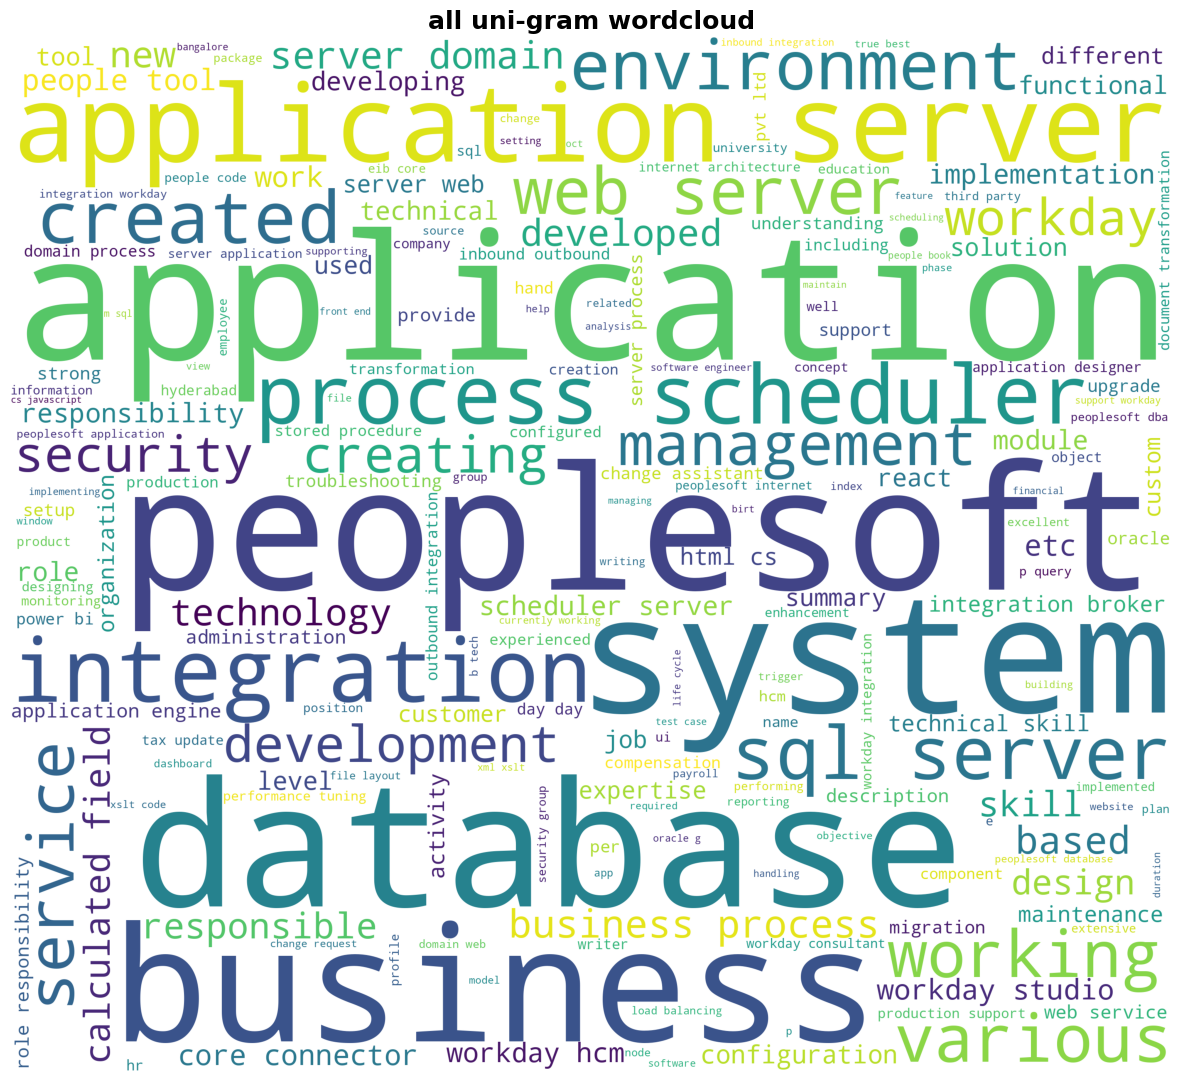

In [32]:
string_Total=" ".join(Resumes_cleaned["Resume_cln"])

#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(15,15))
plt.title('all uni-gram wordcloud', fontsize= 18, fontweight= 'bold')
plt.axis('off')
wordcloud_stw=WordCloud(background_color= 'white',width = 2800,height = 2500).generate(string_Total)
plt.imshow(wordcloud_stw)

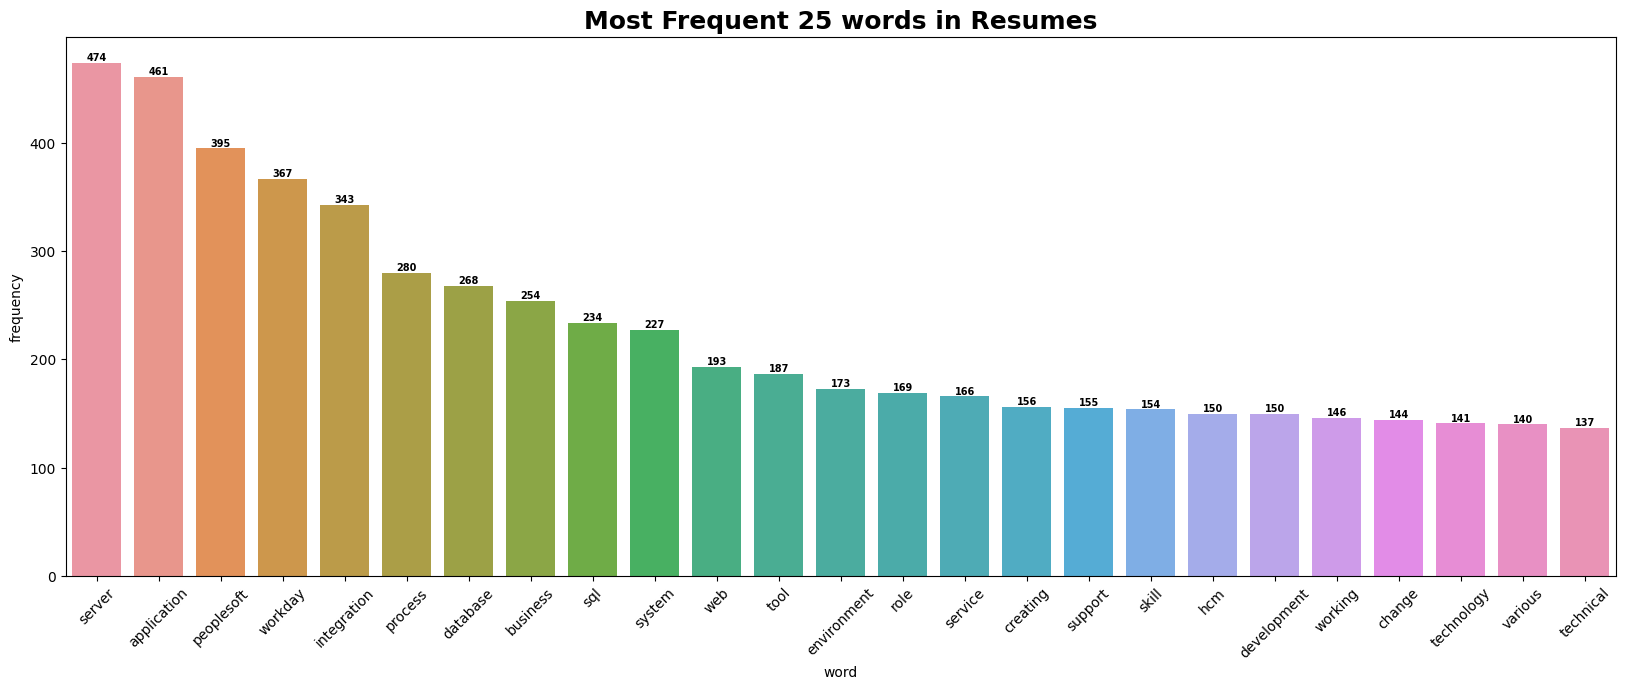

In [33]:

#uni-gram plot
import matplotlib.pyplot as plt
import seaborn as sns

top25_unigram=freq_swdf.iloc[0:25,:]
fig=plt.figure(figsize=(20,7))
plot=sns.barplot(x=top25_unigram['word'],y=top25_unigram['frequency'])
plt.title('Most Frequent 25 words in Resumes', fontsize= 18, fontweight= 'bold')
for i in plot.containers:
  plot.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 7)
plot.set_xticklabels(rotation=45,labels=top25_unigram["word"])
plt.show()

In [34]:
#count vectorizer tells the frequency of a word
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
#Bi-gram
def get_top_n2_words(corpus,n=None):
  vec1=CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus) # for tri-gram=(3,3)
  bag_of_words=vec1.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)

  return words_freq[:n]

In [36]:
top2_words=get_top_n2_words(Resumes_cleaned["Resume_cln"],n=200) #top 200
top2_df=pd.DataFrame(top2_words)
top2_df.columns=['Bi-gram',"Freq"]
top2_df.head(50)

Bi-gram  Freq
0        application server   120
1         process scheduler   108
2                sql server   102
3                web server    89
4          business process    79
5             server domain    75
6          calculated field    66
7               people tool    64
8            core connector    62
9            workday studio    62
10              workday hcm    57
11         scheduler server    56
12               server web    48
13                  html cs    47
14          technical skill    45
15       integration broker    44
16       application engine    44
17      role responsibility    42
18              web service    42
19           server process    41
20         change assistant    38
21                  pvt ltd    37
22                 power bi    36
23                  day day    35
24           domain process    35
25         inbound outbound    35
26     outbound integration    35
27         stored procedure    34
28  document transformation    32
29     application designer    31
30               tax update    30
31       production support    30
32      workday integration    30
33       performance tuning    29
34       workday consultant    29
35    internet architecture    28
36       server application    27
37              people code    27
38      peoplesoft internet    26
39                 eib core    26
40           peoplesoft dba    25
41           security group    25
42              third party    25
43   peoplesoft application    24
44               domain web    24
45      integration workday    24
46           load balancing    23
47     database application    23
48              file layout    23
49                true best    22

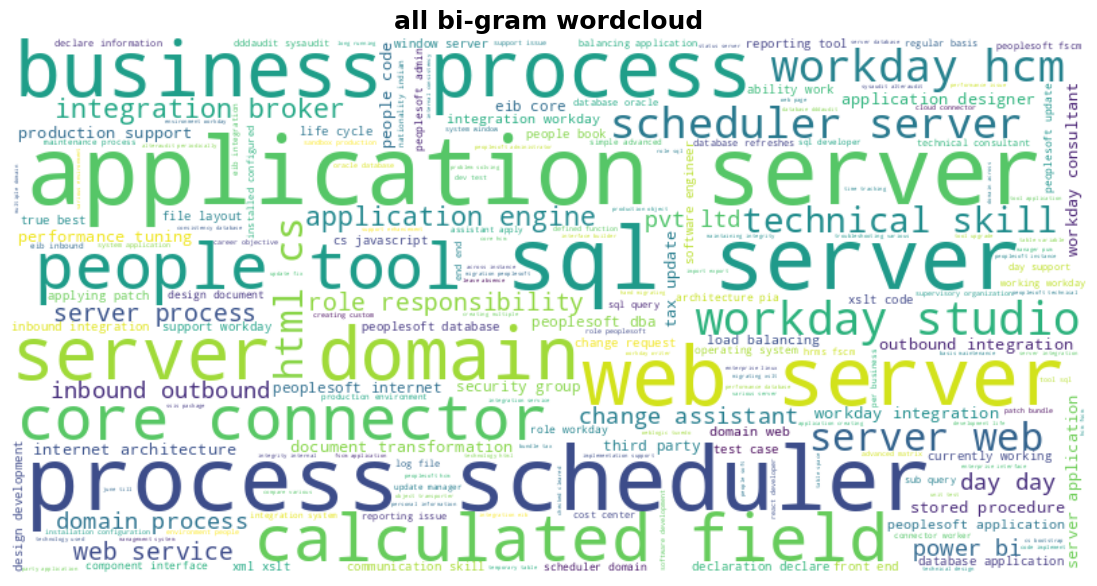

In [37]:
words = top2_df['Bi-gram'].tolist()
quantities = top2_df['Freq'].tolist()

wordcloud_dict = dict(zip(words, quantities))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

plt.figure(figsize=(14, 7))
plt.title('all bi-gram wordcloud', fontsize= 18, fontweight= 'bold')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


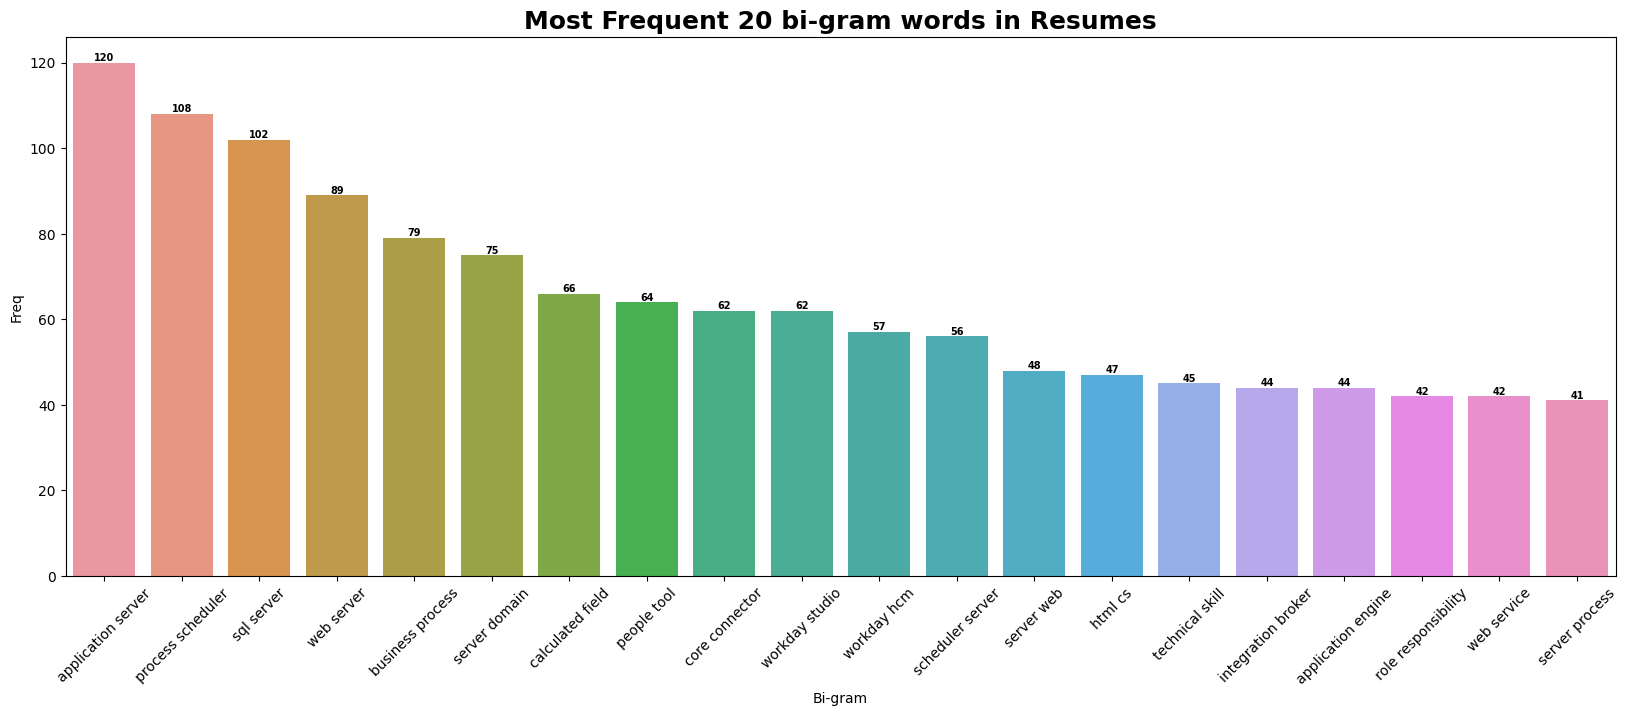

In [38]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns

top20_bigram=top2_df.iloc[0:20,:]
fig=plt.figure(figsize=(20,7))
plot=sns.barplot(x=top20_bigram['Bi-gram'],y=top20_bigram['Freq'])
plt.title('Most Frequent 20 bi-gram words in Resumes', fontsize= 18, fontweight= 'bold')
for i in plot.containers:
  plot.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 7)
plot.set_xticklabels(rotation=45,labels=top20_bigram["Bi-gram"])
plt.show()

In [39]:
#Tri-gram
def get_top_n3_words(corpus,n=None):
  vec1=CountVectorizer(ngram_range=(3,3),max_features=2000).fit(corpus)
  bag_of_words=vec1.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)

  return words_freq[:n]

In [40]:
top3_words=get_top_n3_words(Resumes_cleaned["Resume_cln"],n=200) #top 200
top3_df=pd.DataFrame(top3_words)
top3_df.columns=['Tri-gram',"Freq"]
top3_df

Tri-gram  Freq
0      process scheduler server    56
1             server web server    47
2      server process scheduler    41
3        application server web    37
4     application server domain    37
..                          ...   ...
195        worker work employee     7
196   work employee demographic     7
197  employee demographic build     7
198   demographic build benefit     7
199   build benefit integration     7

[200 rows x 2 columns]

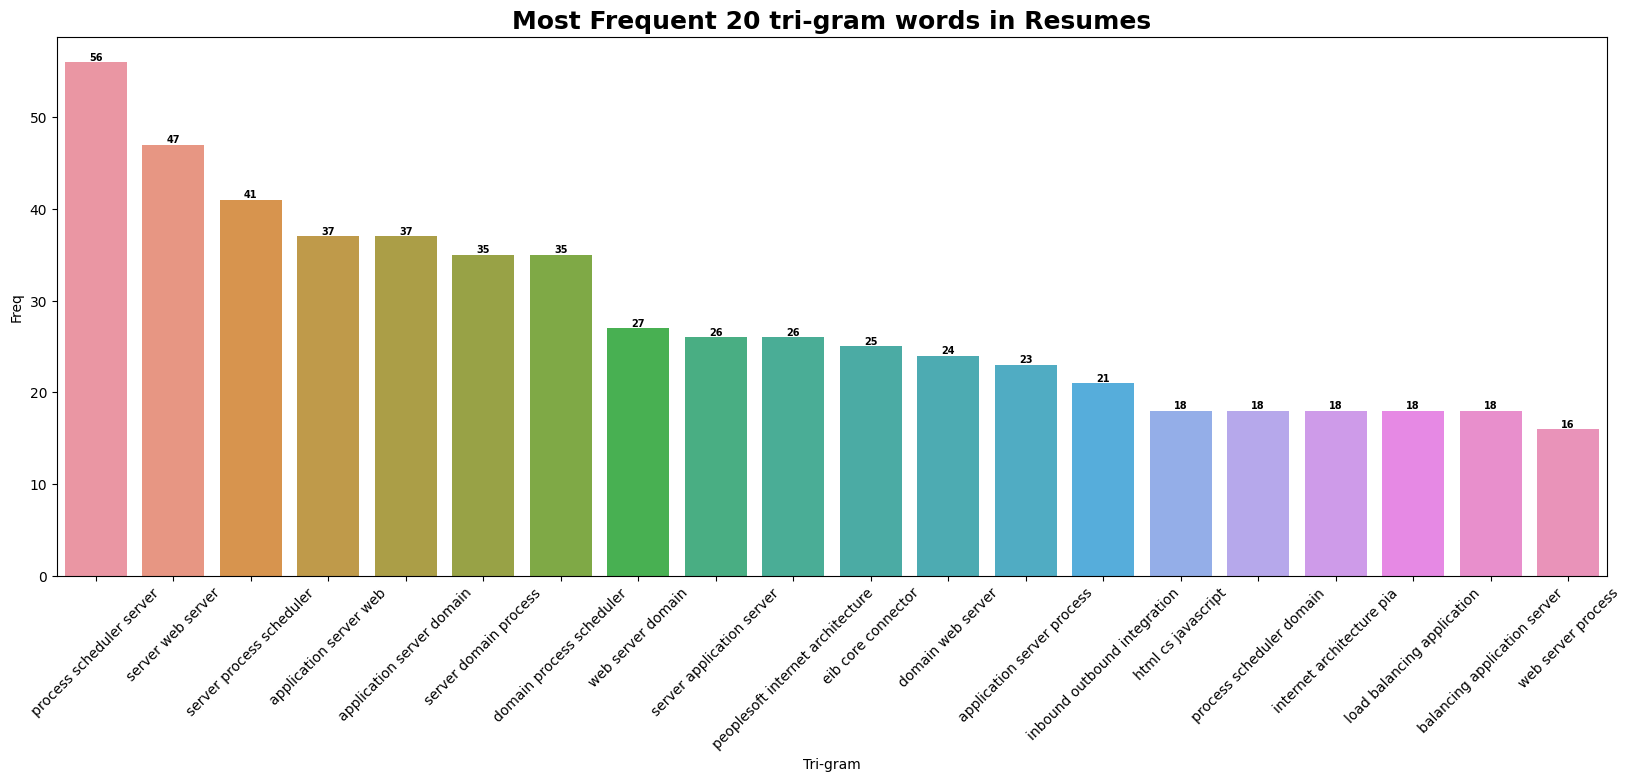

In [41]:
#Tri-gram plot
import matplotlib.pyplot as plt
import seaborn as sns

top20_bigram=top3_df.iloc[0:20,:]
fig=plt.figure(figsize=(20,7))
plot=sns.barplot(x=top20_bigram['Tri-gram'],y=top20_bigram['Freq'])
plt.title('Most Frequent 20 tri-gram words in Resumes', fontsize= 18, fontweight= 'bold')
for i in plot.containers:
  plot.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 7)
plot.set_xticklabels(rotation=45,labels=top20_bigram["Tri-gram"])
plt.show()


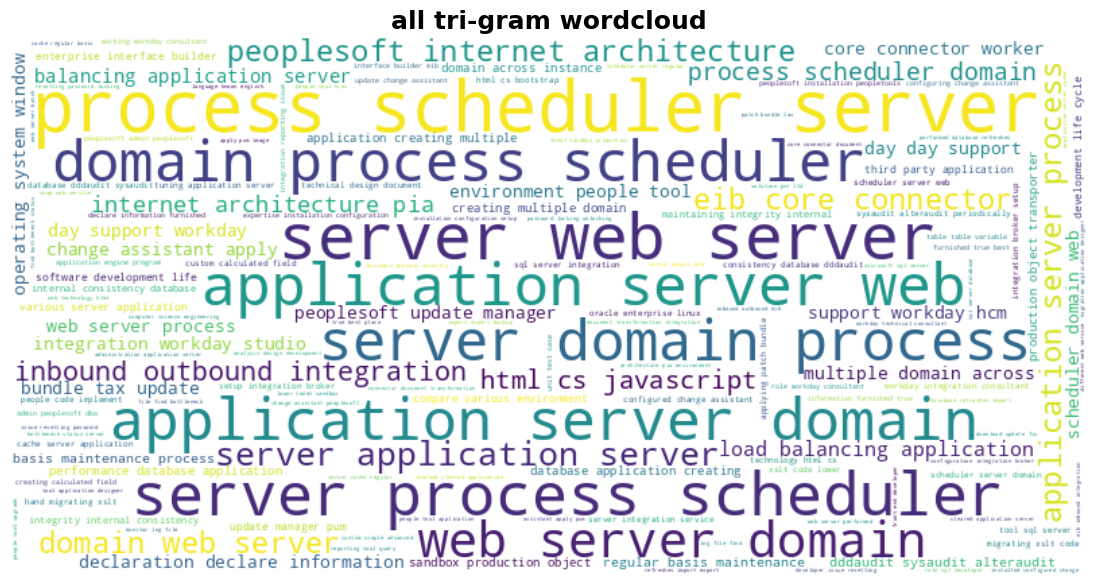

In [42]:
words = top3_df['Tri-gram'].tolist()
quantities = top3_df['Freq'].tolist()

wordcloud_dict = dict(zip(words, quantities))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

plt.figure(figsize=(14, 7))
plt.title('all tri-gram wordcloud', fontsize= 18, fontweight= 'bold')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Visuals for individual roles

In [43]:
from wordcloud import WordCloud, STOPWORDS
#count vectorizer tells the frequency of a word
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
#word frequency
freq_sw1=pd.Series(' '.join(Resumes_cleaned.loc[Resumes_cleaned['Category'] == 'React Developer','Resume_cln']).split()).value_counts()[:50]
freq_sw1
freq_swdf1=pd.DataFrame(freq_sw1).reset_index()
freq_swdf1.rename(columns={'index':'word',0:'frequency'},inplace=True)
freq_swdf1

word  frequency
0            react         96
1             html         64
2               cs         55
3       technology         51
4      application         50
5       javascript         47
6              web         46
7            skill         46
8        developer         41
9               ui         36
10     development         33
11         service         32
12            used         32
13          system         29
14          design         29
15       bootstrap         28
16         working         26
17            work         26
18      developing         24
19             end         24
20            role         23
21        software         22
22       component         22
23      management         22
24            page         21
25       designing         20
26         website         20
27  responsibility         19
28           front         19
29        customer         18
30   communication         17
31           redux         17
32     engineering         17
33        language         16
34     responsible         16
35           based         16
36       technical         16
37            code         15
38           place         15
39          jquery         15
40     information         15
41               e         14
42    organization         14
43            best         14
44         ability         13
45     environment         13
46         summary         13
47         reactjs         13
48     description         13
49         concept         13

In [45]:
#Bi-gram
def get_top_n2_words(corpus,n=None):
  vec1=CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus) # for tri-gram=(3,3)
  bag_of_words=vec1.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)

  return words_freq[:n]

In [46]:
top2_words1=get_top_n2_words(Resumes_cleaned.loc[Resumes_cleaned['Category'] == 'React Developer','Resume_cln'],n=200) #top 200
top2_df1=pd.DataFrame(top2_words1)
top2_df1.columns=['Bi-gram',"Freq"]
top2_df1.head(50)

Bi-gram  Freq
0                html cs    47
1              front end    19
2          cs javascript    19
3        react developer    13
4        technical skill    11
5           cs bootstrap    11
6        technology html    11
7               web page    11
8              true best    10
9         web technology    10
10       technology used    10
11          ui developer     9
12   role responsibility     8
13           react redux     8
14               pvt ltd     7
15         end developer     7
16       react component     7
17       web application     7
18  javascript bootstrap     7
19      computer science     6
20        language known     6
21    nationality indian     6
22     management system     6
23   declaration declare     6
24            best place     6
25     software engineer     6
26       bootstrap react     6
27         english hindi     6
28    software developer     6
29               map tag     6
30             test case     5
31   science engineering     5
32         visual studio     5
33      operating system     5
34         system window     5
35             page html     5
36          ability work     5
37     javascript jquery     5
38       javascript html     5
39       object oriented     5
40         known english     4
41         tech computer     4
42     metrolabs service     4
43           service pvt     4
44  software development     4
45      development life     4
46            life cycle     4
47           restful api     4
48        component form     4
49            form event     4

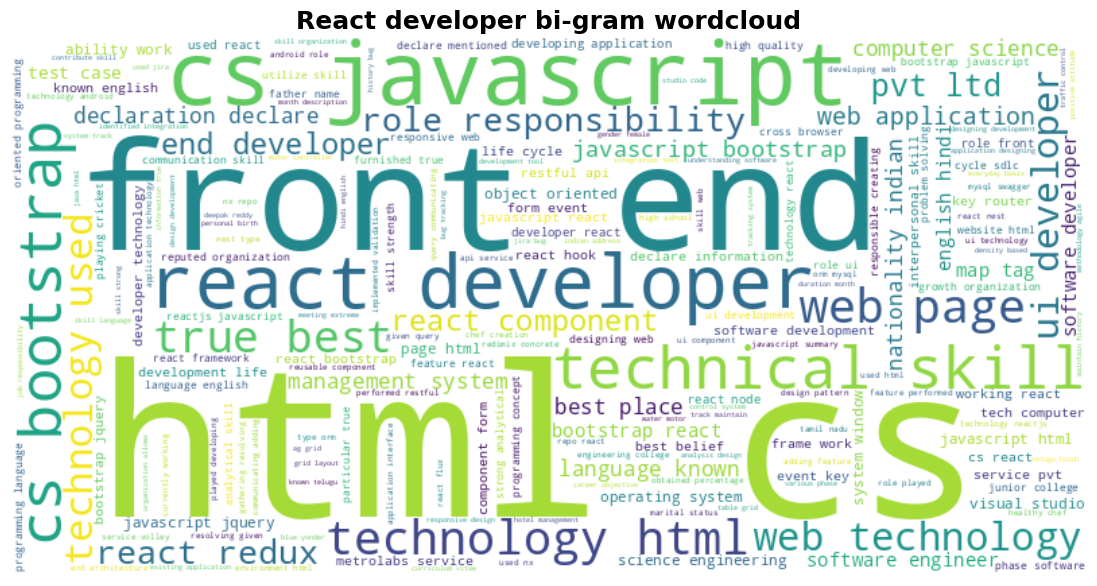

In [47]:
words = top2_df1['Bi-gram'].tolist()
quantities = top2_df1['Freq'].tolist()

wordcloud_dict = dict(zip(words, quantities))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

plt.figure(figsize=(14, 7))
plt.title('React developer bi-gram wordcloud', fontsize= 18, fontweight= 'bold')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


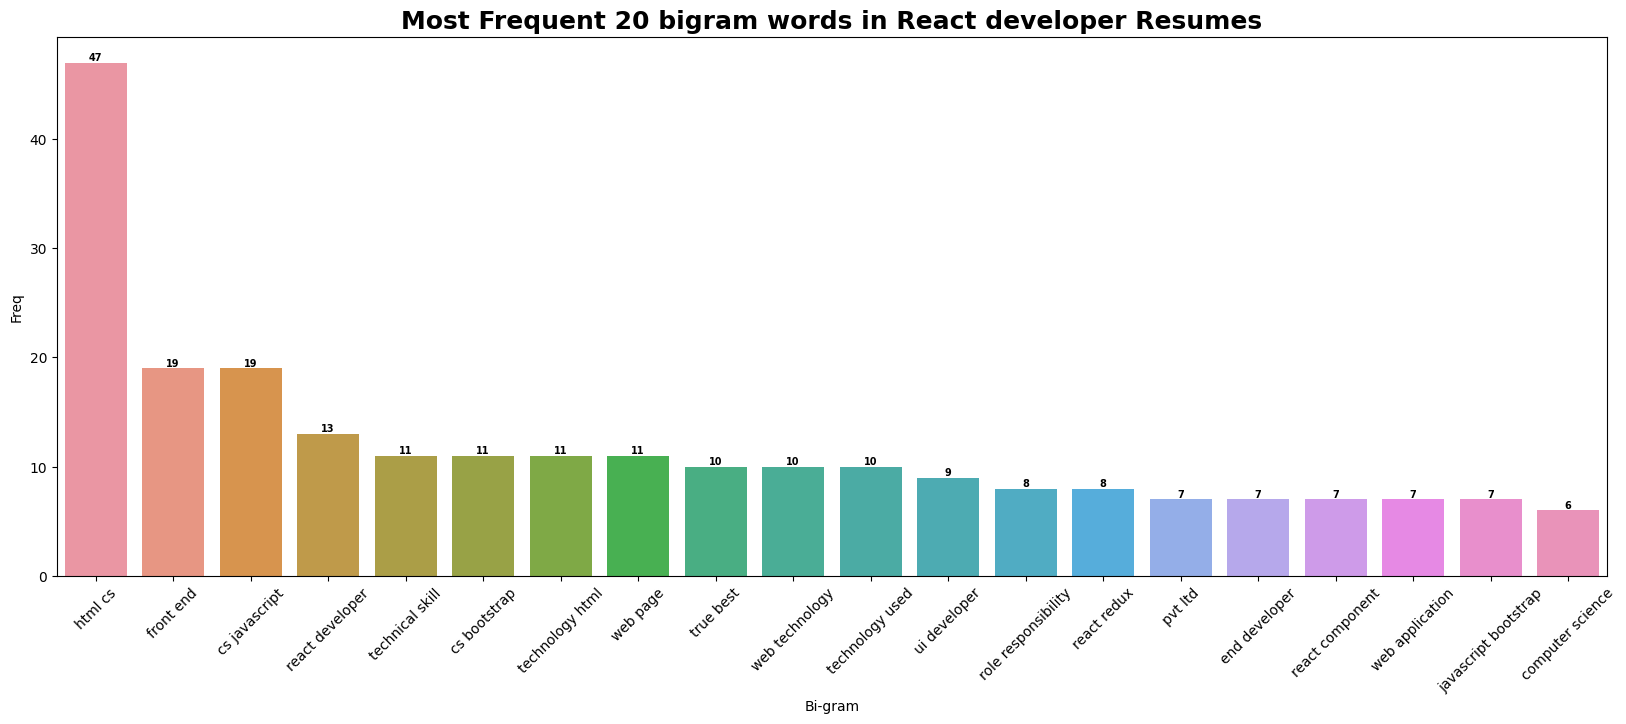

In [48]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns

top20_bigram=top2_df1.iloc[0:20,:]
fig=plt.figure(figsize=(20,7))
plot=sns.barplot(x=top20_bigram['Bi-gram'],y=top20_bigram['Freq'])
plt.title('Most Frequent 20 bigram words in React developer Resumes', fontsize= 18, fontweight= 'bold')
for i in plot.containers:
  plot.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 7)
plot.set_xticklabels(rotation=45,labels=top20_bigram["Bi-gram"])
plt.show()

In [49]:
#word frequency
freq_sw1=pd.Series(' '.join(Resumes_cleaned.loc[Resumes_cleaned['Category'] == 'Peoplesoft','Resume_cln']).split()).value_counts()[:50]
freq_sw1
freq_swdf1=pd.DataFrame(freq_sw1).reset_index()
freq_swdf1.rename(columns={'index':'word',0:'frequency'},inplace=True)
freq_swdf1

word  frequency
0            server        375
1        peoplesoft        369
2       application        341
3          database        187
4           process        144
5       environment        118
6            domain        112
7            people        111
8               web        109
9         scheduler        104
10             tool        100
11           oracle         94
12       production         76
13        migration         75
14             fscm         71
15            issue         69
16            patch         67
17          support         67
18           update         67
19           change         66
20           system         65
21             role         61
22           window         60
23          various         60
24  troubleshooting         54
25            setup         54
26         creating         53
27         instance         52
28              pum         52
29      integration         52
30              hcm         52
31         applying         51
32    configuration         50
33          upgrade         50
34       configured         50
35      development         48
36     installation         48
37             file         47
38      maintenance         47
39      peopletools         47
40      performance         46
41             load         45
42           tuxedo         43
43             test         43
44             hrms         42
45   administration         42
46           broker         42
47        technical         41
48     architecture         41
49                c         40

In [50]:
#Bi-gram
def get_top_n2_words(corpus,n=None):
  vec1=CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus) # for tri-gram=(3,3)
  bag_of_words=vec1.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)

  return words_freq[:n]

In [51]:
top2_words1=get_top_n2_words(Resumes_cleaned.loc[Resumes_cleaned['Category'] == 'React Developer','Resume_cln'],n=200) #top 200
top2_df1=pd.DataFrame(top2_words1)
top2_df1.columns=['Bi-gram',"Freq"]
top2_df1.head(50)

Bi-gram  Freq
0                html cs    47
1              front end    19
2          cs javascript    19
3        react developer    13
4        technical skill    11
5           cs bootstrap    11
6        technology html    11
7               web page    11
8              true best    10
9         web technology    10
10       technology used    10
11          ui developer     9
12   role responsibility     8
13           react redux     8
14               pvt ltd     7
15         end developer     7
16       react component     7
17       web application     7
18  javascript bootstrap     7
19      computer science     6
20        language known     6
21    nationality indian     6
22     management system     6
23   declaration declare     6
24            best place     6
25     software engineer     6
26       bootstrap react     6
27         english hindi     6
28    software developer     6
29               map tag     6
30             test case     5
31   science engineering     5
32         visual studio     5
33      operating system     5
34         system window     5
35             page html     5
36          ability work     5
37     javascript jquery     5
38       javascript html     5
39       object oriented     5
40         known english     4
41         tech computer     4
42     metrolabs service     4
43           service pvt     4
44  software development     4
45      development life     4
46            life cycle     4
47           restful api     4
48        component form     4
49            form event     4

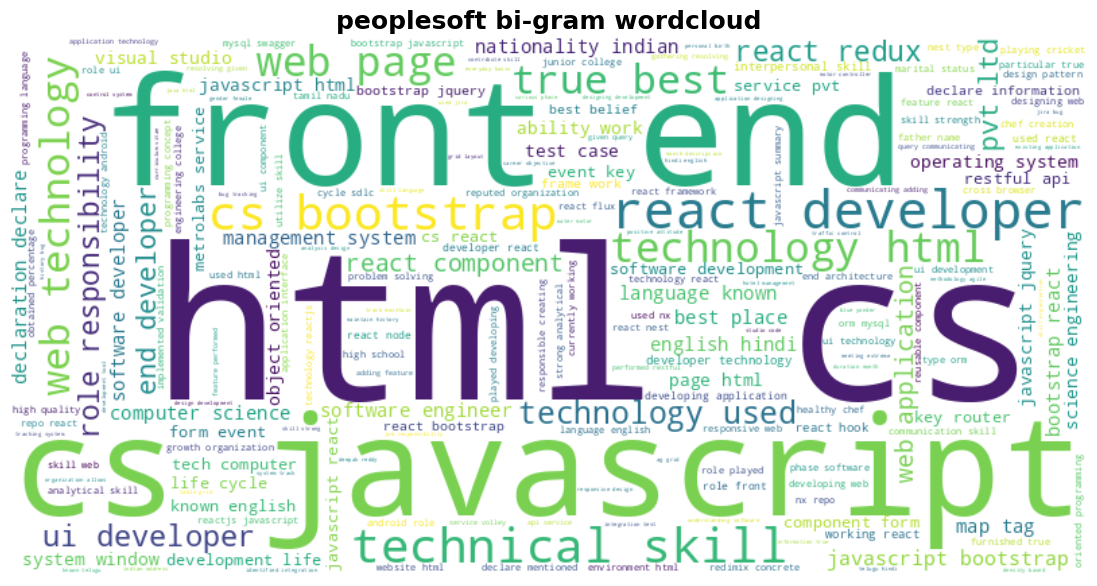

In [52]:
words = top2_df1['Bi-gram'].tolist()
quantities = top2_df1['Freq'].tolist()

wordcloud_dict = dict(zip(words, quantities))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

plt.figure(figsize=(14, 7))
plt.title('peoplesoft bi-gram wordcloud', fontsize= 18, fontweight= 'bold')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


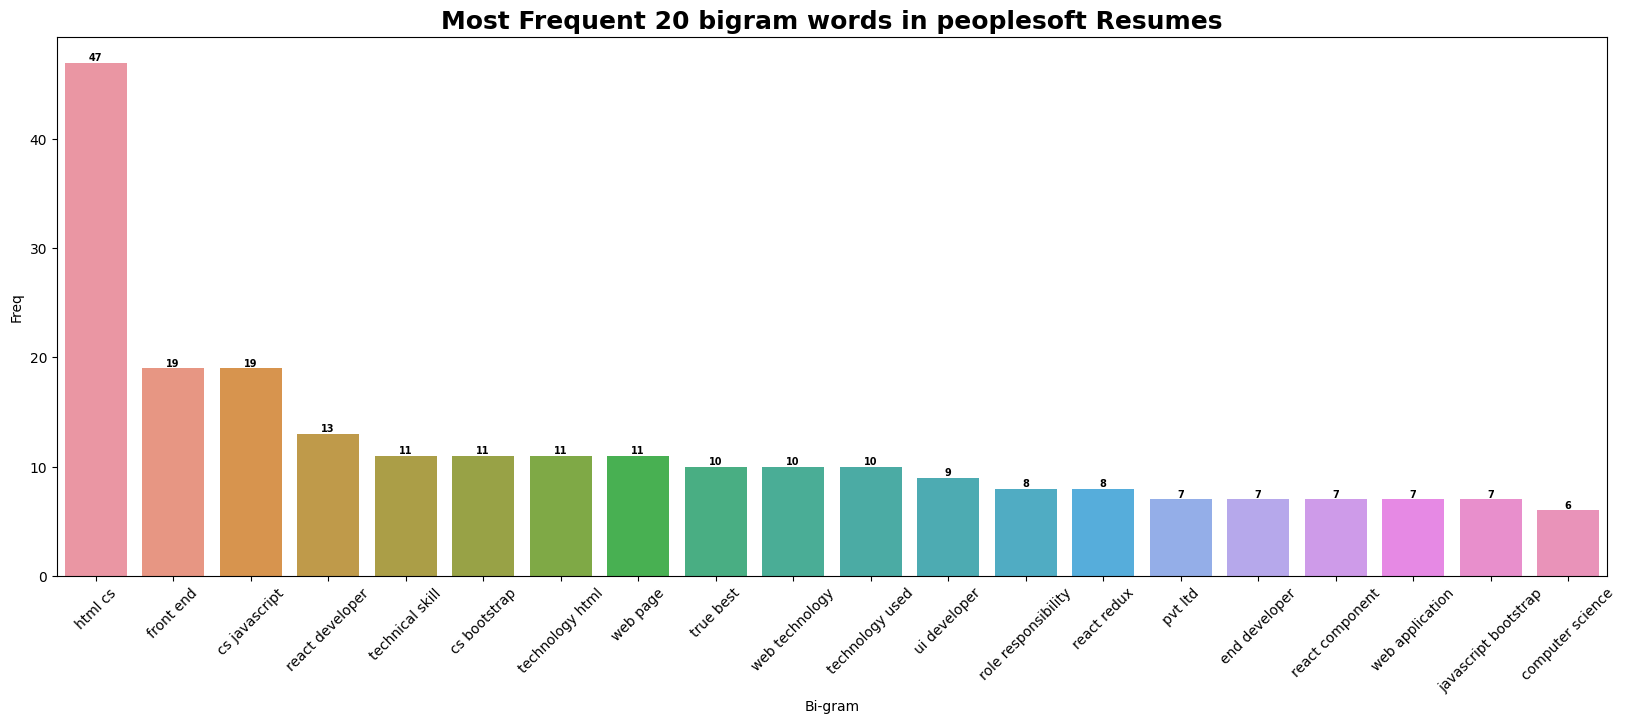

In [53]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns

top20_bigram=top2_df1.iloc[0:20,:]
fig=plt.figure(figsize=(20,7))
plot=sns.barplot(x=top20_bigram['Bi-gram'],y=top20_bigram['Freq'])
plt.title('Most Frequent 20 bigram words in peoplesoft Resumes', fontsize= 18, fontweight= 'bold')
for i in plot.containers:
  plot.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 7)
plot.set_xticklabels(rotation=45,labels=top20_bigram["Bi-gram"])
plt.show()

In [54]:
#word frequency
freq_sw1=pd.Series(' '.join(Resumes_cleaned.loc[Resumes_cleaned['Category'] == 'SQL Developer','Resume_cln']).split()).value_counts()[:50]
freq_sw1
freq_swdf1=pd.DataFrame(freq_sw1).reset_index()
freq_swdf1.rename(columns={'index':'word',0:'frequency'},inplace=True)
freq_swdf1

word  frequency
0              sql        197
1           server         95
2            table         75
3         database         64
4            query         62
5         function         59
6               bi         43
7        procedure         41
8         business         40
9          service         39
10           index         37
11          stored         35
12            view         35
13           power         34
14            role         33
15       developer         33
16        creating         31
17            ssis         31
18            join         30
19          design         29
20            tool         29
21     development         28
22            task         27
23         trigger         27
24       developed         25
25      technology         25
26          system         25
27       technical         24
28           skill         24
29     application         23
30             sub         23
31         working         22
32         various         21
33         package         21
34               m         21
35         created         20
36     information         20
37  responsibility         19
38        multiple         19
39     description         18
40         complex         18
41             etl         18
42          source         17
43             etc         17
44     performance         17
45     environment         17
46         writing         17
47            till         16
48            used         16
49             new         16

In [55]:
#Bi-gram
def get_top_n2_words(corpus,n=None):
  vec1=CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus) # for tri-gram=(3,3)
  bag_of_words=vec1.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)

  return words_freq[:n]

In [56]:
top2_words1=get_top_n2_words(Resumes_cleaned.loc[Resumes_cleaned['Category'] == 'React Developer','Resume_cln'],n=200) #top 200
top2_df1=pd.DataFrame(top2_words1)
top2_df1.columns=['Bi-gram',"Freq"]
top2_df1.head(50)

Bi-gram  Freq
0                html cs    47
1              front end    19
2          cs javascript    19
3        react developer    13
4        technical skill    11
5           cs bootstrap    11
6        technology html    11
7               web page    11
8              true best    10
9         web technology    10
10       technology used    10
11          ui developer     9
12   role responsibility     8
13           react redux     8
14               pvt ltd     7
15         end developer     7
16       react component     7
17       web application     7
18  javascript bootstrap     7
19      computer science     6
20        language known     6
21    nationality indian     6
22     management system     6
23   declaration declare     6
24            best place     6
25     software engineer     6
26       bootstrap react     6
27         english hindi     6
28    software developer     6
29               map tag     6
30             test case     5
31   science engineering     5
32         visual studio     5
33      operating system     5
34         system window     5
35             page html     5
36          ability work     5
37     javascript jquery     5
38       javascript html     5
39       object oriented     5
40         known english     4
41         tech computer     4
42     metrolabs service     4
43           service pvt     4
44  software development     4
45      development life     4
46            life cycle     4
47           restful api     4
48        component form     4
49            form event     4

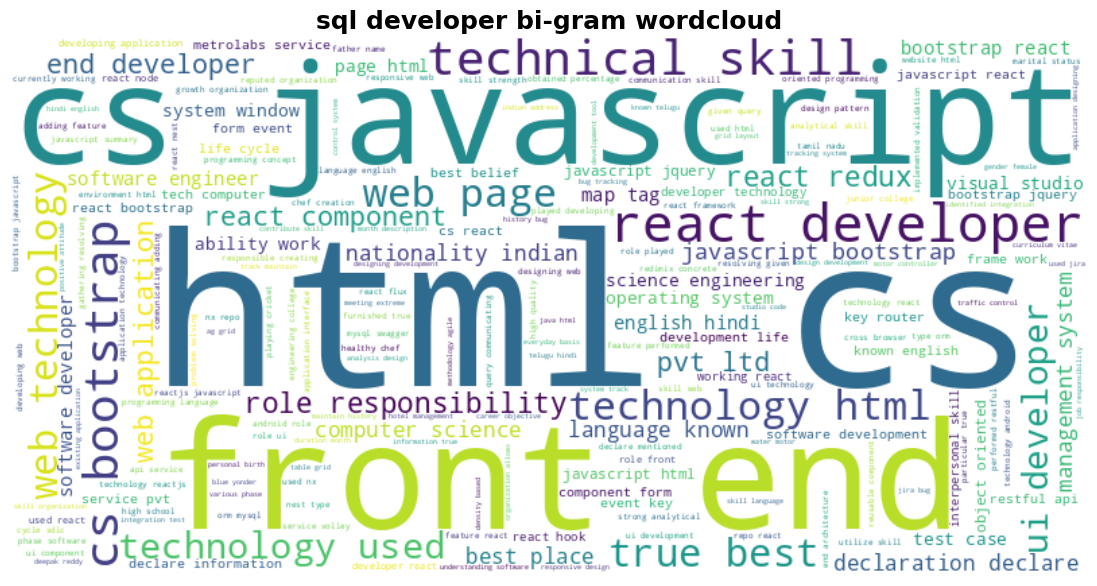

In [57]:
words = top2_df1['Bi-gram'].tolist()
quantities = top2_df1['Freq'].tolist()

wordcloud_dict = dict(zip(words, quantities))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

plt.figure(figsize=(14, 7))
plt.title('sql developer bi-gram wordcloud', fontsize= 18, fontweight= 'bold')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


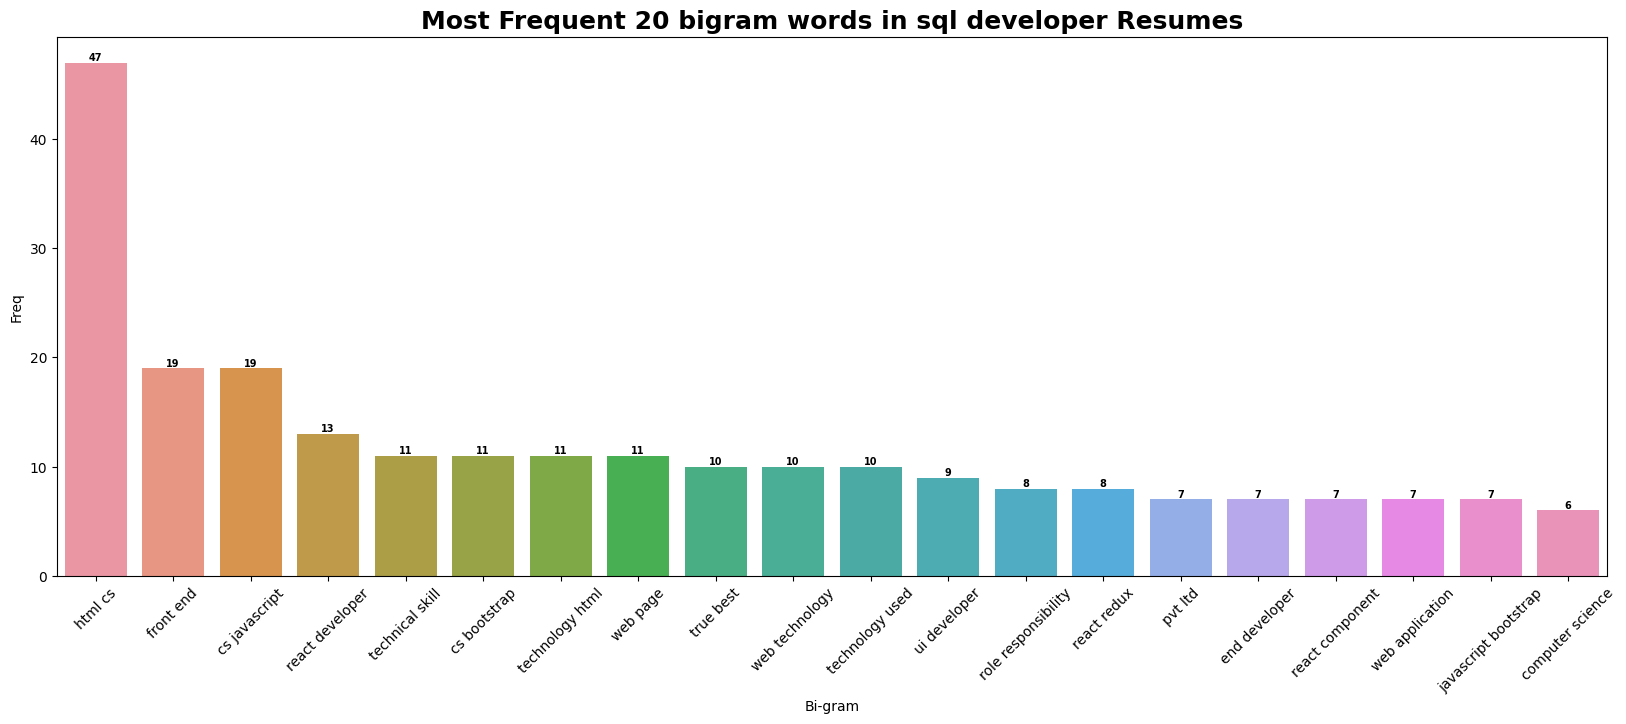

In [58]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns

top20_bigram=top2_df1.iloc[0:20,:]
fig=plt.figure(figsize=(20,7))
plot=sns.barplot(x=top20_bigram['Bi-gram'],y=top20_bigram['Freq'])
plt.title('Most Frequent 20 bigram words in sql developer Resumes', fontsize= 18, fontweight= 'bold')
for i in plot.containers:
  plot.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 7)
plot.set_xticklabels(rotation=45,labels=top20_bigram["Bi-gram"])
plt.show()

In [59]:
Resumes_cleaned['Category'].unique()

array(['React Developer', 'Peoplesoft', 'SQL Developer', 'Workday'],
      dtype=object)

In [60]:
#word frequency
freq_sw1=pd.Series(' '.join(Resumes_cleaned.loc[Resumes_cleaned['Category'] == 'Workday','Resume_cln']).split()).value_counts()[:50]
freq_sw1
freq_swdf1=pd.DataFrame(freq_sw1).reset_index()
freq_swdf1.rename(columns={'index':'word',0:'frequency'},inplace=True)
freq_swdf1

word  frequency
0          workday        367
1      integration        274
2         business        176
3              eib        123
4          process        123
5           system        108
6           custom        102
7              hcm         98
8             core         95
9        connector         93
10           field         90
11          studio         89
12         created         88
13        security         82
14         support         78
15        document         77
16      consultant         72
17          change         71
18      calculated         66
19         service         66
20        creating         65
21         inbound         65
22       developed         64
23            xslt         62
24         working         61
25          design         59
26           issue         57
27             xml         56
28       technical         56
29      functional         56
30             new         56
31            work         54
32         various         53
33        outbound         52
34    compensation         52
35             day         52
36            role         52
37            test         50
38            tool         49
39  transformation         49
40       interface         48
41       reporting         47
42     application         47
43         payroll         47
44           skill         47
45    organization         47
46      management         46
47       different         46
48  responsibility         45
49          writer         44

In [61]:
#Bi-gram
def get_top_n2_words(corpus,n=None):
  vec1=CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus) # for tri-gram=(3,3)
  bag_of_words=vec1.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)

  return words_freq[:n]

In [62]:
top2_words1=get_top_n2_words(Resumes_cleaned.loc[Resumes_cleaned['Category'] == 'React Developer','Resume_cln'],n=200) #top 200
top2_df1=pd.DataFrame(top2_words1)
top2_df1.columns=['Bi-gram',"Freq"]
top2_df1.head(50)

Bi-gram  Freq
0                html cs    47
1              front end    19
2          cs javascript    19
3        react developer    13
4        technical skill    11
5           cs bootstrap    11
6        technology html    11
7               web page    11
8              true best    10
9         web technology    10
10       technology used    10
11          ui developer     9
12   role responsibility     8
13           react redux     8
14               pvt ltd     7
15         end developer     7
16       react component     7
17       web application     7
18  javascript bootstrap     7
19      computer science     6
20        language known     6
21    nationality indian     6
22     management system     6
23   declaration declare     6
24            best place     6
25     software engineer     6
26       bootstrap react     6
27         english hindi     6
28    software developer     6
29               map tag     6
30             test case     5
31   science engineering     5
32         visual studio     5
33      operating system     5
34         system window     5
35             page html     5
36          ability work     5
37     javascript jquery     5
38       javascript html     5
39       object oriented     5
40         known english     4
41         tech computer     4
42     metrolabs service     4
43           service pvt     4
44  software development     4
45      development life     4
46            life cycle     4
47           restful api     4
48        component form     4
49            form event     4

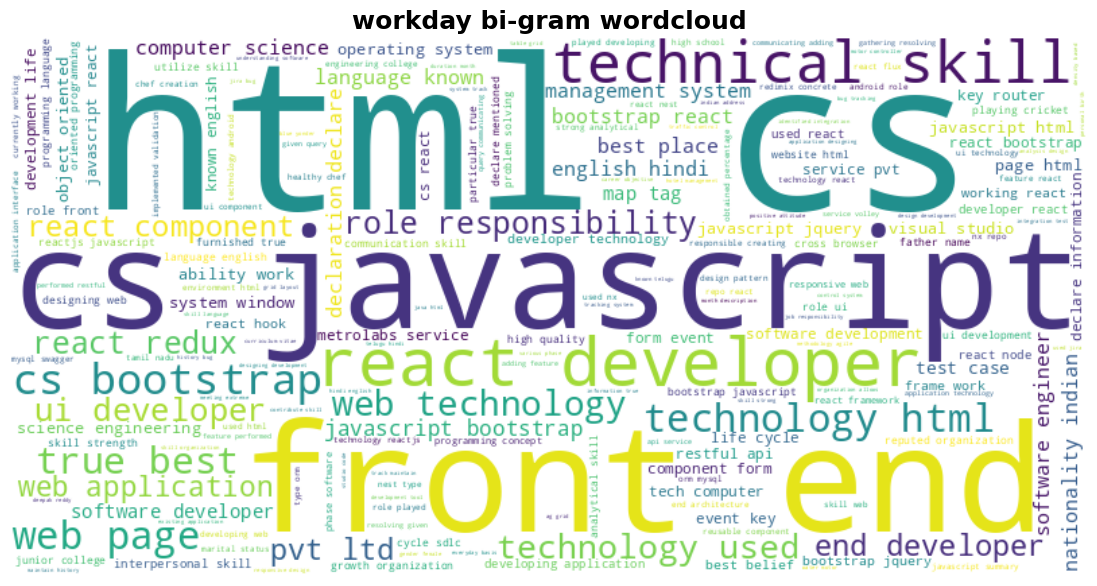

In [63]:
words = top2_df1['Bi-gram'].tolist()
quantities = top2_df1['Freq'].tolist()

wordcloud_dict = dict(zip(words, quantities))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

plt.figure(figsize=(14, 7))
plt.title('workday bi-gram wordcloud', fontsize= 18, fontweight= 'bold')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


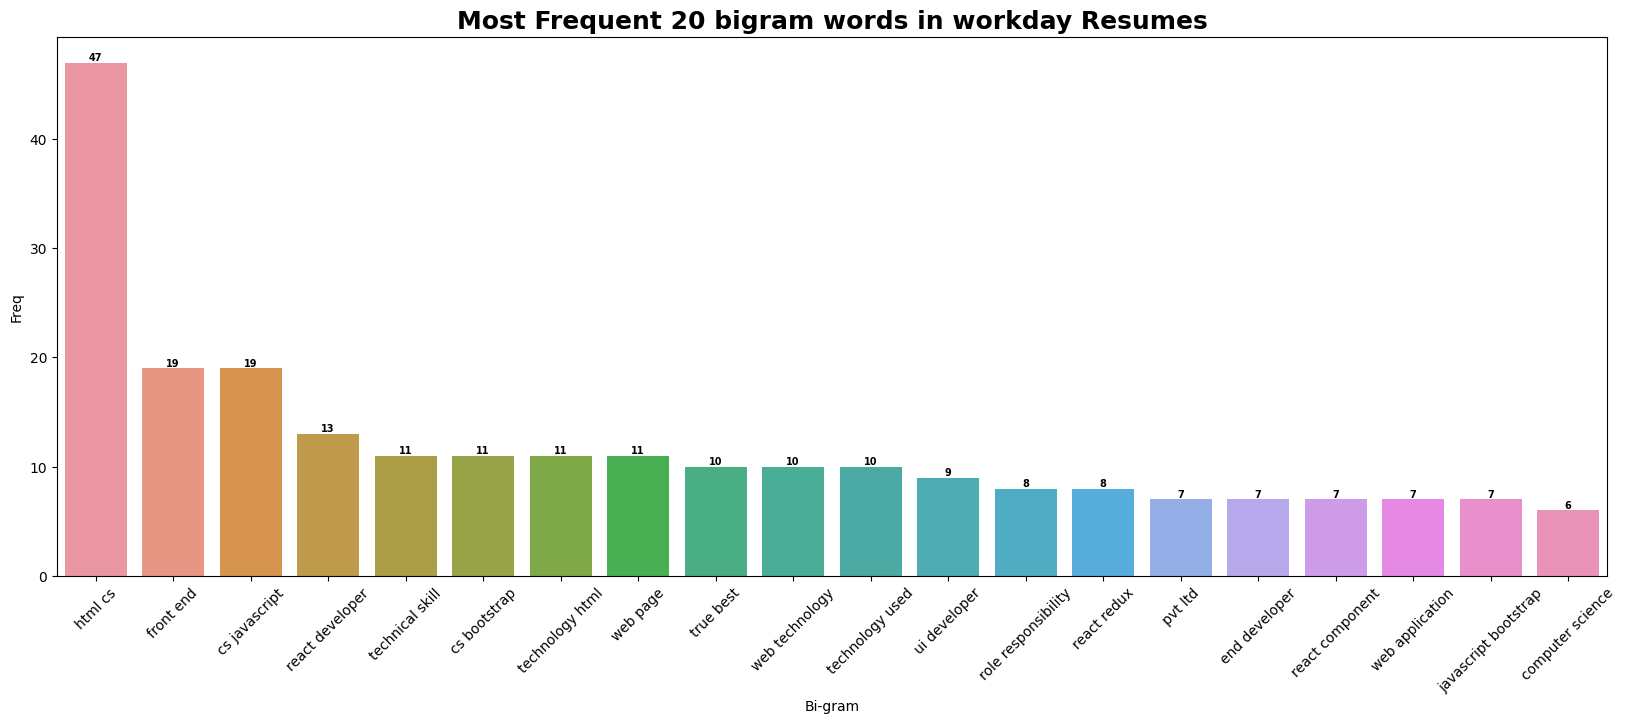

In [64]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns

top20_bigram=top2_df1.iloc[0:20,:]
fig=plt.figure(figsize=(20,7))
plot=sns.barplot(x=top20_bigram['Bi-gram'],y=top20_bigram['Freq'])
plt.title('Most Frequent 20 bigram words in workday Resumes', fontsize= 18, fontweight= 'bold')
for i in plot.containers:
  plot.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 7)
plot.set_xticklabels(rotation=45,labels=top20_bigram["Bi-gram"])
plt.show()

## Part of speech tagging

In [65]:
Resumes_cleaned

Resume_cln         Category
0   name ravali p curriculum vitae specialization ...  React Developer
1   susovan bag seeking challenging position field...  React Developer
2   kanumuru deepak reddy career objective secure ...  React Developer
3   haripriya battina ui developer reactjs javascr...  React Developer
4   kamalakar reddy linked summary ui development ...  React Developer
..                                                ...              ...
72  workday integration consultant name sri krishn...          Workday
73  seeking suitable position workday hcm techno f...          Workday
74  workday hcm fcm name kumar role workday consul...          Workday
75  venkateswarlu b workday consultant implementat...          Workday
76  vinay kumar v workday functional consultant ex...          Workday

[77 rows x 2 columns]

In [66]:
Resumes_sen=Resumes_cleaned.copy()
Resumes_sen=[x.strip() for x in Resumes_cleaned.Resume_cln]# strip for removing lead n tail chars/spaces
Resumes_sen=[x for x in Resumes_sen if x]
Resumes_sen[0:25]

['name ravali p curriculum vitae specialization computer science engg utilize technical skill achieving target developing best performance organization manual skill strong sdlc concept extensive white box functional integration extreme system adhoc reliability exploratory stlc concept test case test scenario globalization compatibility regression test plan agile methdology scrum methodology expertise sprint planning meeting scrum meeting extreme sprint retrospective meeting product backlog meeting bug triage meeting extreme normalization java skill method overloading method overriding understanding static nonstatic understanding variable constructor abstraction encapsulation inheritance collection training course industrial exposure achievement certified cyber security training sjbit bengaluru certified volleyball olympics distict level assignements identified functional test case flipkart com identified integration test case whatsapp identified integration test case amazon com found d

In [67]:
## part of speech tagging
# nlp = spacy.load('en)
nlp=spacy.load('en_core_web_sm')

one_block=Resumes_sen[21]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [68]:
one_block

'page name prabakaran title ui developer summary software developer different ui based application hand html cs reactjs hand handling ui interaction design methodology handling app purchase uploading maintaining apps play store hand customization base product depends cohesive worker strong analytical problem solving interpersonal skill education completed bachelor technology ece prist university tamil nadu completed higher secondary mount park hr sec school thiyagadurgam tamil nadu completed sslc krishnasamy hr sec school cuddalore tamil nadu skill operating system window unix mac programming language html cs react mobile app development window android apps designing constatinant layout motion layout architectural pattern mvc ide android studio service aws bucket service bitbucket boomi name e commerce online store developed maintains react code role front end developer e commerce technology android role played developing application technology react html gathering resolving given quer

In [69]:
for token in doc_block[0:20]:
  print(token,token.pos_)

page NOUN
name NOUN
prabakaran PROPN
title PROPN
ui PROPN
developer NOUN
summary NOUN
software NOUN
developer NOUN
different ADJ
ui PROPN
based VERB
application NOUN
hand NOUN
html PROPN
cs PROPN
reactjs PROPN
hand NOUN
handling VERB
ui ADP


In [70]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
Resumes_cleaned

Resume_cln         Category
0   name ravali p curriculum vitae specialization ...  React Developer
1   susovan bag seeking challenging position field...  React Developer
2   kanumuru deepak reddy career objective secure ...  React Developer
3   haripriya battina ui developer reactjs javascr...  React Developer
4   kamalakar reddy linked summary ui development ...  React Developer
..                                                ...              ...
72  workday integration consultant name sri krishn...          Workday
73  seeking suitable position workday hcm techno f...          Workday
74  workday hcm fcm name kumar role workday consul...          Workday
75  venkateswarlu b workday consultant implementat...          Workday
76  vinay kumar v workday functional consultant ex...          Workday

[77 rows x 2 columns]

In [73]:
import pandas as pd

# shuffle the entire DataFrame, frac parameter specifies the fraction of rows you want to randomly select
shuffled_df = Resumes_cleaned.sample(frac=1).reset_index(drop=True)
shuffled_df

Resume_cln       Category
0   name gopi krishna reddy summery working workda...        Workday
1   peoplesoft application enhancement implementat...     Peoplesoft
2   shireesh balasani hcm consultant profile summa...        Workday
3   peoplesoft application enhancement support upg...     Peoplesoft
4   priyanka ramadoss mountpleasant coonoor nilgir...     Peoplesoft
..                                                ...            ...
72  name sumanth royal summary total information t...        Workday
73  resume name neeraj mishra month oracle develop...  SQL Developer
74  arun venu summary month multiple peoplesoft up...     Peoplesoft
75  hari krishna summary result oriented yr softwa...        Workday
76  name naresh babu cherukuri objective take resp...        Workday

[77 rows x 2 columns]

In [74]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

def report(model):
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    print('\nMoldel train Accuracy score:',np.round(accuracy_score(y_train,model.predict(X_train))*100,2),'%')
    print('\nMoldel test Accuracy score:',np.round(accuracy_score(y_test,model.predict(X_test))*100,2),'%')
    print('\n classification_report:\n',classification_report(y_test,preds))
    print('\n confusion matrix:\n')
    cmt=confusion_matrix(y_test, preds)
    fig, ax = plot_confusion_matrix(conf_mat=cmt, cmap='PiYG')
    plt.show()

# TFIDF

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Splitting the dataframe into train and test sets
train_df, test_df = train_test_split(shuffled_df, test_size=0.2, random_state=42)

# Vectorize the resumes
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['Resume_cln'])
X_test = vectorizer.transform(test_df['Resume_cln'])

# Create target variables
y_train = train_df['Category']
y_test = test_df['Category']

# Train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [76]:
from sklearn.svm import SVC
clf = SVC()
param_grid = [{'kernel':['rbf', 'sigmoid', 'poly','linear'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]
grid_svm = GridSearchCV(clf,param_grid,cv=10)#,verbose=480
best_clf = grid_svm.fit(X_train,y_train)

#Printing the best hyperparameters,best score
print('The best hyper parameters are:\n',best_clf.best_params_)
print('Best Accuracy Through Grid Search : {:.3f}'.format(best_clf.best_score_))

The best hyper parameters are:
 {'C': 10, 'gamma': 0.5, 'kernel': 'sigmoid'}
Best Accuracy Through Grid Search : 0.967



Moldel train Accuracy score: 100.0 %

Moldel test Accuracy score: 100.0 %

 classification_report:
                  precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         4
React Developer       1.00      1.00      1.00         4
  SQL Developer       1.00      1.00      1.00         3
        Workday       1.00      1.00      1.00         5

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16


 confusion matrix:



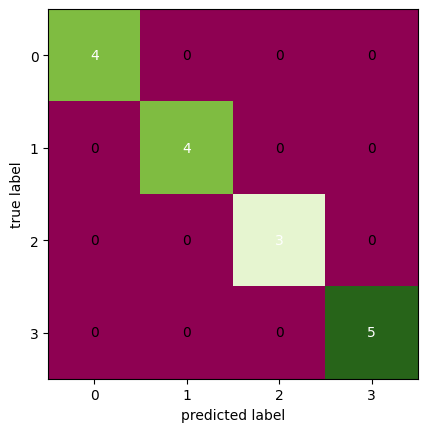

In [77]:
svc_wp = SVC(C= 10, gamma= 0.5, kernel= 'sigmoid')
report(svc_wp)


Moldel train Accuracy score: 100.0 %

Moldel test Accuracy score: 100.0 %

 classification_report:
                  precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         4
React Developer       1.00      1.00      1.00         4
  SQL Developer       1.00      1.00      1.00         3
        Workday       1.00      1.00      1.00         5

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16


 confusion matrix:



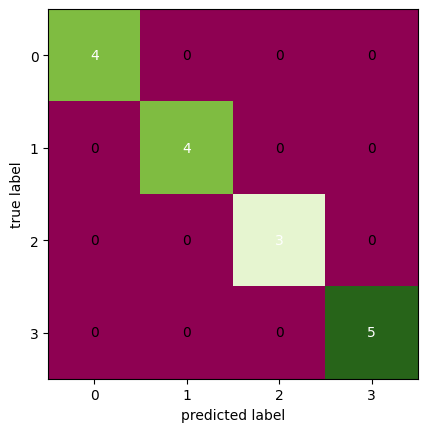

In [78]:
#without Paremeter
from sklearn.naive_bayes import MultinomialNB
model_wop_MNB=MultinomialNB()
report(model_wop_MNB)

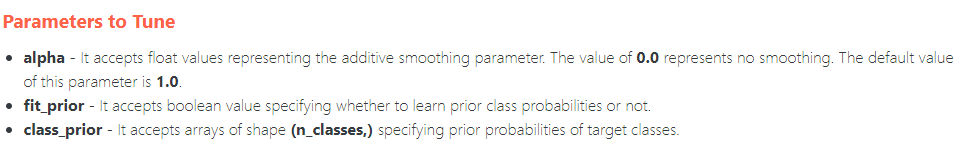

In [79]:
n_features, n_classes = X_train.shape[1], np.unique(Resumes_cleaned.Category)

n_features, n_classes

(3206,
 array(['Peoplesoft', 'React Developer', 'SQL Developer', 'Workday'],
       dtype=object))

In [80]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* len(n_classes), ]
         }

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(X_train,y_train)

print('Best Accuracy Through Grid Search : {:.3f}'.format(multinomial_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(multinomial_nb_grid.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Accuracy Through Grid Search : 1.000
Best Parameters : {'alpha': 0.01, 'class_prior': None, 'fit_prior': True}




Moldel train Accuracy score: 100.0 %

Moldel test Accuracy score: 100.0 %

 classification_report:
                  precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         4
React Developer       1.00      1.00      1.00         4
  SQL Developer       1.00      1.00      1.00         3
        Workday       1.00      1.00      1.00         5

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16


 confusion matrix:



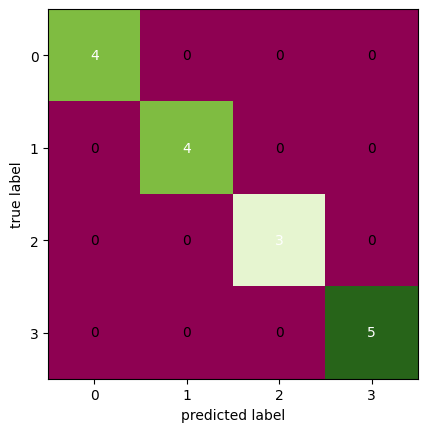

In [81]:
#with Paremeter
model_wp_MNB=MultinomialNB(alpha= 0.01 ,class_prior= None, fit_prior= True)
report(model_wp_MNB)

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


Moldel train Accuracy score: 100.0 %

Moldel test Accuracy score: 100.0 %

 classification_report:
                  precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         4
React Developer       1.00      1.00      1.00         4
  SQL Developer       1.00      1.00      1.00         3
        Workday       1.00      1.00      1.00         5

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16


 confusion matrix:



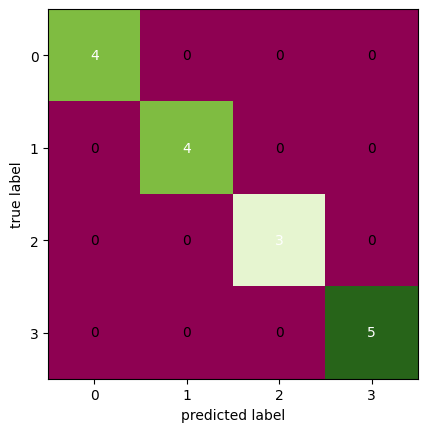

In [83]:
decisiontree_wop=DecisionTreeClassifier()
report(decisiontree_wop)

In [84]:
params = {'ccp_alpha':[0.1,.01,.001],"criterion":["gini", "entropy"], "max_depth":(list(range(1,10)))}

tree_clf = DecisionTreeClassifier(random_state= 42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)

best_clf = tree_cv.fit(X_train,y_train)

#Printing the best hyperparameters,best score
print('The best hyper parameters are:\n',best_clf.best_params_)
print('Best Accuracy Through Grid Search : {:.3f}'.format(best_clf.best_score_))

Fitting 3 folds for each of 54 candidates, totalling 162 fits
The best hyper parameters are:
 {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 3}
Best Accuracy Through Grid Search : 0.950



Moldel train Accuracy score: 100.0 %

Moldel test Accuracy score: 100.0 %

 classification_report:
                  precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         4
React Developer       1.00      1.00      1.00         4
  SQL Developer       1.00      1.00      1.00         3
        Workday       1.00      1.00      1.00         5

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16


 confusion matrix:



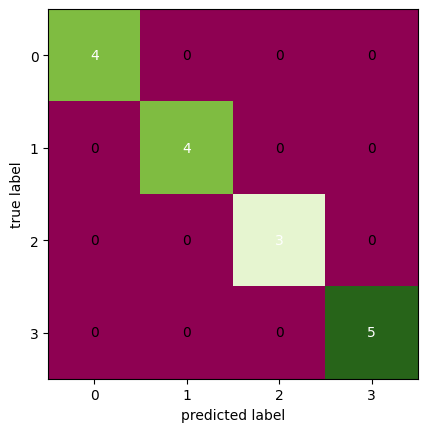

In [85]:
decisiontree_wp=DecisionTreeClassifier(ccp_alpha= 0.1, criterion= 'gini', max_depth= 3)
report(decisiontree_wp)


Moldel train Accuracy score: 100.0 %

Moldel test Accuracy score: 100.0 %

 classification_report:
                  precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         4
React Developer       1.00      1.00      1.00         4
  SQL Developer       1.00      1.00      1.00         3
        Workday       1.00      1.00      1.00         5

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16


 confusion matrix:



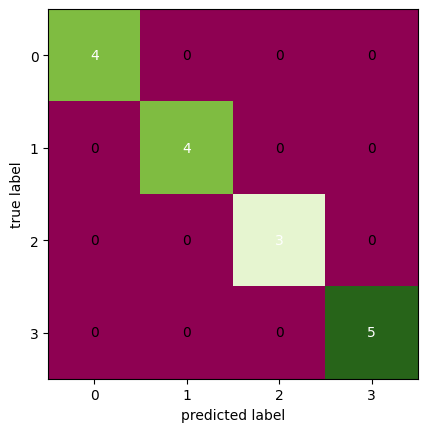

In [86]:
from sklearn.ensemble import RandomForestClassifier
randomforest_wop=RandomForestClassifier()
report(randomforest_wop)

In [87]:
params = {'n_estimators': [100,200, 500],'max_features': ['auto', 'sqrt', 'log2'],"criterion":["gini", "entropy"], "max_depth":(list(range(1,10)))}

rf_clf = RandomForestClassifier(random_state= 42)
tree_cv = GridSearchCV(rf_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
best_clf = tree_cv.fit(X_train,y_train)

#Printing the best hyperparameters,best score
print('The best hyper parameters are:\n',best_clf.best_params_)
print('Best Accuracy Through Grid Search : {:.3f}'.format(best_clf.best_score_))

Fitting 3 folds for each of 162 candidates, totalling 486 fits
The best hyper parameters are:
 {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
Best Accuracy Through Grid Search : 0.967



Moldel train Accuracy score: 100.0 %

Moldel test Accuracy score: 100.0 %

 classification_report:
                  precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         4
React Developer       1.00      1.00      1.00         4
  SQL Developer       1.00      1.00      1.00         3
        Workday       1.00      1.00      1.00         5

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16


 confusion matrix:



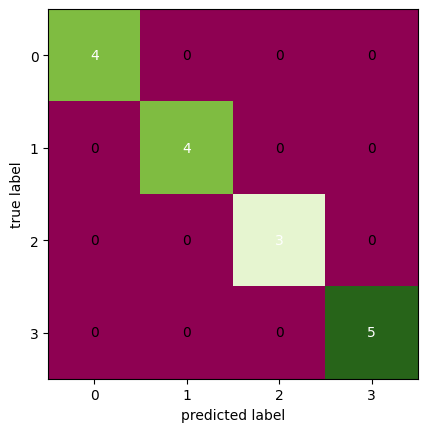

In [88]:
randomforest_wp=RandomForestClassifier(criterion= 'gini', max_depth= 3, max_features= 'auto', n_estimators=500)
report(randomforest_wp)


Moldel train Accuracy score: 100.0 %

Moldel test Accuracy score: 93.75 %

 classification_report:
                  precision    recall  f1-score   support

     Peoplesoft       1.00      0.75      0.86         4
React Developer       1.00      1.00      1.00         4
  SQL Developer       0.75      1.00      0.86         3
        Workday       1.00      1.00      1.00         5

       accuracy                           0.94        16
      macro avg       0.94      0.94      0.93        16
   weighted avg       0.95      0.94      0.94        16


 confusion matrix:



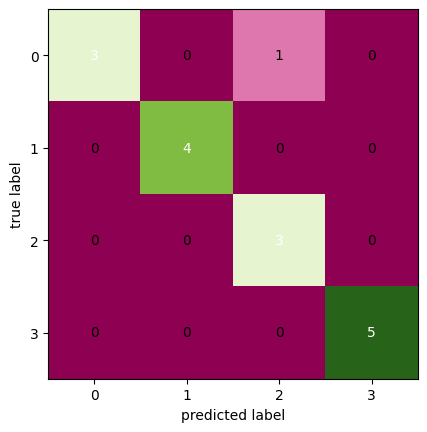

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gboost_wop=GradientBoostingClassifier()
report(gboost_wop)

In [90]:
gbc = GradientBoostingClassifier()
param_grid = {
    "n_estimators":[10,20,50,100,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.1,1,2,3]
}

grid_gboost=GridSearchCV(estimator=gbc,param_grid=param_grid,verbose = 1, cv=5, n_jobs = -1)
best_clf = grid_gboost.fit(X_train,y_train)

#Printing the best hyperparameters,best score
print('The best hyper parameters are:\n',best_clf.best_params_)
print('Best Accuracy Through Grid Search : {:.3f}'.format(best_clf.best_score_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
The best hyper parameters are:
 {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10}
Best Accuracy Through Grid Search : 1.000



Moldel train Accuracy score: 100.0 %

Moldel test Accuracy score: 93.75 %

 classification_report:
                  precision    recall  f1-score   support

     Peoplesoft       1.00      0.75      0.86         4
React Developer       1.00      1.00      1.00         4
  SQL Developer       0.75      1.00      0.86         3
        Workday       1.00      1.00      1.00         5

       accuracy                           0.94        16
      macro avg       0.94      0.94      0.93        16
   weighted avg       0.95      0.94      0.94        16


 confusion matrix:



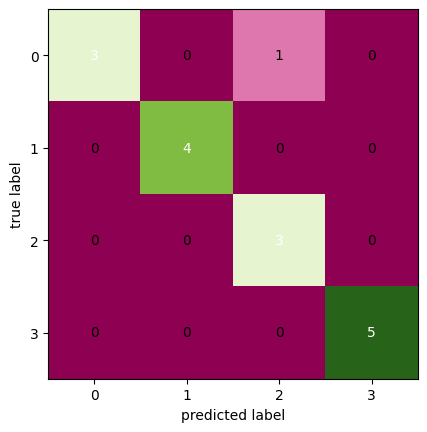

In [91]:
gboost_wp=GradientBoostingClassifier(learning_rate= 0.1, max_depth= 1, n_estimators= 20)
report(gboost_wp)


Moldel train Accuracy score: 73.77 %

Moldel test Accuracy score: 75.0 %

 classification_report:
                  precision    recall  f1-score   support

     Peoplesoft       0.00      0.00      0.00         4
React Developer       0.57      1.00      0.73         4
  SQL Developer       0.75      1.00      0.86         3
        Workday       1.00      1.00      1.00         5

       accuracy                           0.75        16
      macro avg       0.58      0.75      0.65        16
   weighted avg       0.60      0.75      0.66        16


 confusion matrix:



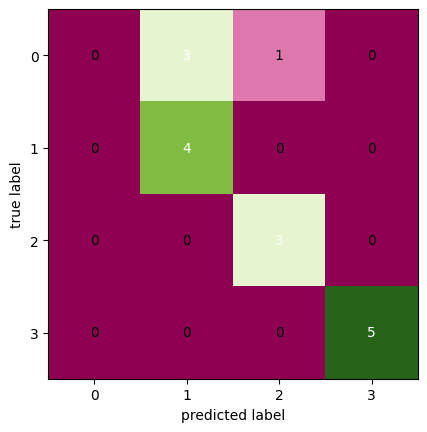

In [92]:
from sklearn.ensemble import AdaBoostClassifier
adboost_wop=AdaBoostClassifier()
report(adboost_wop)

In [93]:
from sklearn.ensemble import AdaBoostClassifier
adboost_clf=AdaBoostClassifier()
param_grid = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
}
grid_adboost=GridSearchCV(estimator=adboost_clf,param_grid=param_grid,verbose = 1, cv=5, n_jobs = -1)
best_clf = grid_adboost.fit(X_train,y_train)

#Printing the best hyperparameters,best score
print('The best hyper parameters are:\n',best_clf.best_params_)
print('Best Accuracy Through Grid Search : {:.3f}'.format(best_clf.best_score_))

Fitting 5 folds for each of 192 candidates, totalling 960 fits
The best hyper parameters are:
 {'algorithm': 'SAMME.R', 'learning_rate': 0.97, 'n_estimators': 3}
Best Accuracy Through Grid Search : 1.000



Moldel train Accuracy score: 100.0 %

Moldel test Accuracy score: 100.0 %

 classification_report:
                  precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         4
React Developer       1.00      1.00      1.00         4
  SQL Developer       1.00      1.00      1.00         3
        Workday       1.00      1.00      1.00         5

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16


 confusion matrix:



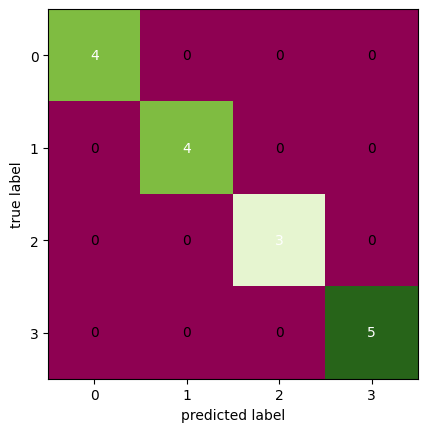

In [94]:
adboost_wp=AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 0.99, n_estimators= 8)
report(adboost_wp)


Moldel train Accuracy score: 100.0 %

Moldel test Accuracy score: 100.0 %

 classification_report:
                  precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         4
React Developer       1.00      1.00      1.00         4
  SQL Developer       1.00      1.00      1.00         3
        Workday       1.00      1.00      1.00         5

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16


 confusion matrix:



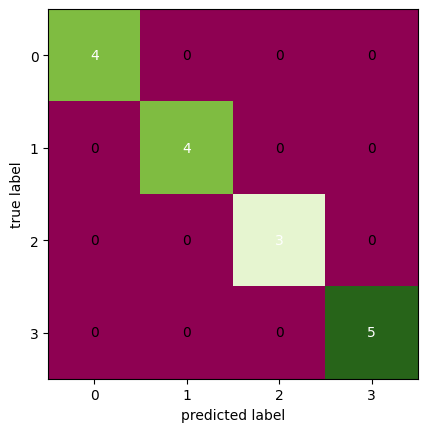

In [95]:
from sklearn.ensemble import BaggingClassifier
model_wop_Bagging=BaggingClassifier()
report(model_wop_Bagging)

In [96]:
bagg = BaggingClassifier()
#Setting values for the parameters
n_estimators = [100, 300, 500]
max_samples = [5, 10, 25, 50]
max_features = [50, 100, 500]

#Creating a dictionary for the hyper parameters
hyperbag = dict(n_estimators = n_estimators, max_samples = max_samples,
              max_features = max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridbag = GridSearchCV(bagg, hyperbag, cv = 3, verbose = 1, n_jobs = -1)
bestbag = gridbag.fit(X_train, y_train)

#Printing the best hyperparameters,best score
print('The best hyper parameters are:\n',gridbag.best_params_)
print('Best Accuracy Through Grid Search : {:.3f}'.format(gridbag.best_score_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
The best hyper parameters are:
 {'max_features': 500, 'max_samples': 25, 'n_estimators': 300}
Best Accuracy Through Grid Search : 0.984



Moldel train Accuracy score: 100.0 %

Moldel test Accuracy score: 100.0 %

 classification_report:
                  precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         4
React Developer       1.00      1.00      1.00         4
  SQL Developer       1.00      1.00      1.00         3
        Workday       1.00      1.00      1.00         5

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16


 confusion matrix:



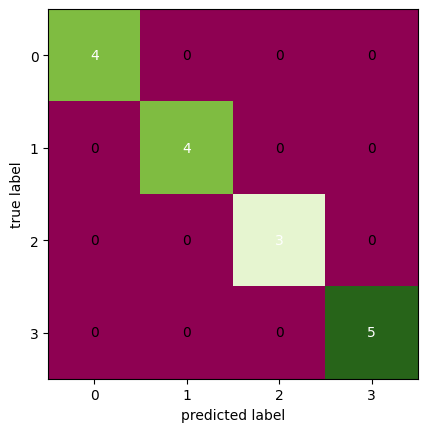

In [97]:
#Fitting the bagging model with the best hyper parameters obtained through GridSearchCV
model_wp_Bagging = BaggingClassifier(max_features=500, max_samples=25,n_estimators= 100)
report(model_wp_Bagging)

In [101]:
#Model Deployment
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
model_wop_MNB=MultinomialNB()

# Vectorizing X
XT = vectorizer.fit_transform(Resumes_cleaned['Resume_cln'])
# Training Mo del on Complete data
model_MNB = MultinomialNB()
model_MNBD = model_MNB.fit(XT,Resumes_cleaned['Category'])

In [102]:
import pickle
filename = 'model_MNBD.pkl'
pickle.dump(model_MNBD,open(filename,'wb'))

filename = 'VECTOR.pkl'
pickle.dump(vectorizer,open(filename,'wb'))